<a href="https://colab.research.google.com/github/shreyas-sreedhar/ipl-data-analysis/blob/main/DSETM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_2

**

*` - Shreyas S Sreedhar 002874944`*

In [144]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [145]:
import pandas as pd
import seaborn as sns
import psutil

In [146]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
6
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

1
Checking whether there is an H2O instance running at http://localhost:42687..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsllrzfcs
  JVM stdout: /tmp/tmpsllrzfcs/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsllrzfcs/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:42687
Connecting to H2O server at http://127.0.0.1:42687 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_ghb3go
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [147]:
ipl_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv"
)
ipl_matches_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Matches%202008-2020.csv"
)

In [148]:
ipl_data.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [149]:
# Viewing data in the file
ipl_matches_data.head()
dff = ipl_matches_data

In [150]:
df = h2o.import_file(path='https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [151]:
df.describe(chunk_summary=True)

Rows:193468
Cols:18

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              1        0.694445            80  B     0.00196733
CXI           Sparse Integers            39       27.0833             138.5 KB  3.48783
C1N           1-Byte Integers (w/o NAs)  56       38.8889             1.3 MB    33.3974
C2            2-Byte Integers            40       27.7778             1.8 MB    47.6438
C2S           2-Byte Fractions           3        2.08333             142.3 KB  3.5825
C4            4-Byte Integers            5        3.47222             472.0 KB  11.8865

Frame distribution summary: 
                 size    number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ------  ----------------  -----------------------------  ------------------
127.0.0.1:42687  3.9 MB  193468            8                              144
mean             3.9 MB  193468            8                              144
min              3.9 MB  193468            8                              144
max              3.9 MB  193468            8                              144
stddev           0  B    0                 0                              0
total            3.9 MB  193468            8                              144

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
type,int,int,int,int,enum,enum,enum,int,int,int,int,int,enum,enum,enum,enum,enum,enum
mins,335982.0,1.0,0.0,1.0,,,,0.0,0.0,0.0,0.0,0.0,,,,,,
mean,756768.8084386048,1.482131411913079,9.177026691752655,3.6159674985010457,,,,1.240230942584821,0.06641408398288089,1.3066450265677005,8.270101515496103e-05,0.049077883681022186,,,,,,
maxs,1237181.0,2.0,19.0,9.0,,,,6.0,7.0,7.0,1.0,1.0,,,,,,
sigma,306097.0914176313,0.4996819029337365,5.67684789466175,1.8071276073795628,,,,1.610866552047968,0.3399913362666675,1.5988017649331967,0.009093657302209603,0.216031215893172,,,,,,
zeros,0,0,10254,0,,,,77637,183235,67841,193452,183973,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,335982.0,1.0,6.0,5.0,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982.0,1.0,6.0,6.0,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982.0,1.0,7.0,1.0,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [152]:
import plotly.express as px
import pandas as pd


# Create a histogram of the result_margin column
fig = px.histogram(dff, x='result_margin',
                   title='Distribution of Match Result Margins',
                   labels={'result_margin': 'Result Margin'}, # can adjust label as needed
                   nbins=30, # Adjust the number of bins as needed for granularity
                   marginal='box', # Add a boxplot to the top of the histogram
                   color_discrete_sequence=['indianred'] # Color of the histogram bars
                  )

# Update layout if needed
fig.update_layout(bargap=0.2) # Adjust the gap between bars

fig.show()


In [153]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [154]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [155]:
df.types


{'id': 'int',
 'inning': 'int',
 'over': 'int',
 'ball': 'int',
 'batsman': 'enum',
 'non_striker': 'enum',
 'bowler': 'enum',
 'batsman_runs': 'int',
 'extra_runs': 'int',
 'total_runs': 'int',
 'non_boundary': 'int',
 'is_wicket': 'int',
 'dismissal_kind': 'enum',
 'player_dismissed': 'enum',
 'fielder': 'enum',
 'extras_type': 'enum',
 'batting_team': 'enum',
 'bowling_team': 'enum'}

In [156]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [157]:
print(df_train.shape)
print(df_test.shape)

(154713, 18)
(38755, 18)


In [158]:
X=df.columns
print(X)

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [161]:
predictors = X
response = 'total_runs'

In [162]:
#Seperate Dependent variable from Independent variable
y_numeric ='total_runs'
X.remove(y_numeric)
print(X)

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [164]:

# Set up AutoML
aml = H2OAutoML(max_runtime_secs=100, seed=1)

Independent Variables (Features)
These are the variables that could influence the outcome of the match. They do not change based on other variables in this dataset:

city: The city in which the match is played could affect the outcome due to home advantage, weather conditions, etc.
date: The date of the match might influence the outcome due to various factors like player conditions, daylight, etc.
venue: Similar to the city, but more specific; certain teams may perform better at specific venues.
neutral_venue: Indicates whether the venue is neutral or not, which could influence team performance.
team1, team2: The teams playing the match. Their strengths and weaknesses are likely to influence the match outcome.
toss_winner: The team winning the toss, which can be crucial in deciding the match outcome depending on the toss decision.
toss_decision: Whether the toss-winning team chooses to bat or bowl first, which can significantly influence the game's outcome.
eliminator: Indicates if the match is an eliminator, which might add pressure affecting the teams' performances.
method: Refers to any match-specific methods used, like the Duckworth-Lewis method, which could influence the final outcome.
Dependent Variable (Target)
This is the variable you are trying to predict or explain, which depends on the independent variables:

winner: The team that won the match. This is a direct outcome of the match and is influenced by the independent variables listed above.


In [165]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240220_34856


GLM Model: summary
    family    link      regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    gaussian  identity  Ridge ( lambda = 1.564E-4 )  nlambda = 30, lambda.max = 156.45, lambda.min = 1.564E-4, lambda.1se = -1.0  2929                          2668                           30                      AutoML_1_20240220_34856_training_py_110_sid_a3b1

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.2779270853684322e-07
RMSE: 0.0003574810603889991
MAE: 0.00022608064433288469
RMSLE: 0.00015131522034137618
Mean Residual Deviance: 1.2779270853684322e-07
R^2: 0.9999999500499693
Null degrees of freedom: 108243
Residual degrees of freedom: 105575
Null deviance: 276932.64168910723
Residual deviance: 0.013832793942862059
AIC: -1405618.2976090237

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1.381352847503044e-07
RMSE: 0.0003716655549688515
MAE: 0.0002285908729140408
RMSLE: 0.00015506541744633417
Mean Residual Deviance: 1.381352847503044e-07
R^2: 0.999999944500475
Null degrees of freedom: 15365
Residual degrees of freedom: 12697
Null deviance: 38256.851777508055
Residual deviance: 0.002122586785473177
AIC: -193759.64743791302

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train          deviance_test           alpha    iterations    training_rmse          training_deviance       training_mae            training_r2         validation_rmse        validation_deviance    validation_mae         validation_r2
---  -------------------  ----------  -----------  --------  ------------  ----------------------  ----------------------  -------  ------------  ---------------------  ----------------------  ----------------------  ------------------  ---------------------  ---------------------  ---------------------  -----------------
     2024-02-20 03:49:29  0.000 sec   1            .16E3     2669          2.5257822755870114      2.4580595481713767      0.0
     2024-02-20 03:49:30  1.241 sec   2            .97E2     2669          2.5061983682643136      2.4390635241114498      0.0
     2024-02-20 03:49:31  1.520 sec   3            .6E2      2669          2.4751616417712325      2.40895743695479        0.0
     2024-02-20 03:49:31  1.837 sec   4            .37E2     2669          2.426447065944944       2.361701473429848       0.0
     2024-02-20 03:49:31  2.098 sec   5            .23E2     2669          2.351185873540703       2.2886876292003633      0.0      5             0.0003574810603889991  1.2779270853684322e-07  0.00022608064433288469  0.9999999500499693  0.0003716655549688515  1.381352847503044e-07  0.0002285908729140408  0.999999944500475
     2024-02-20 03:49:31  2.305 sec   6            .14E2     2669          2.2375101009451037      2.1783931740325087      0.0
     2024-02-20 03:49:32  2.557 sec   7            .9E1      2669          2.0718799579031115      2.0176560452968366      0.0
     2024-02-20 03:49:32  2.793 sec   8            .56E1     2669          1.8429536954551007      1.7954199205061354      0.0
     2024-02-20 03:49:32  3.057 sec   9            .35E1     2669          1.5493532676437138      1.510253345543033       0.0
     2024-02-20 03:49:32  3.365 sec   10           .21E1     2669          1.2087053369011984      1.1791338290972093      0.0
---  ---                  ---         ---          ---       ---           ---                     ---                     ---      -

In [166]:
print(aml.leaderboard)


model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance
GLM_1_AutoML_1_20240220_34856                           0.000371666  1.38135e-07  0.000228591  0.000155065               1.38135e-07
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_34856  0.000420423  1.76755e-07  0.000270825  0.000181681               1.76755e-07
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_34856  0.00899935   8.09882e-05  0.00495157   0.00523727                8.09882e-05
XGBoost_1_AutoML_1_20240220_34856                       0.0331639    0.00109984   0.016416     0.0196243                 0.00109984
DRF_1_AutoML_1_20240220_34856                           0.111992     0.0125422    0.0281152    0.0448561                 0.0125422
GBM_1_AutoML_1_20240220_34856                           0.137383     0.0188741    0.0926662    0.0654972                 0.0188741
XGBoost_2_AutoML_1_20240220_34856                       0.192016     0.036

In [168]:
#assign index values to all the models generated
sorted_models = aml.leaderboard.sort(by='rmse')

# Select the best model (the one with the lowest mean_per_class_error)
best_model = sorted_models[0]

# Print the details of the best model
print("Best Model:")
print(best_model)

Best Model:
model_id
GLM_1_AutoML_1_20240220_34856
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_34856
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_34856
XGBoost_1_AutoML_1_20240220_34856
DRF_1_AutoML_1_20240220_34856
GBM_1_AutoML_1_20240220_34856
XGBoost_2_AutoML_1_20240220_34856
GBM_3_AutoML_1_20240220_34856
GBM_4_AutoML_1_20240220_34856
GBM_2_AutoML_1_20240220_34856
[10 rows x 1 column]



In [169]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 1.2955135708136013e-07
RMSE: 0.0003599324340502813
MAE: 0.0002277047561030091
RMSLE: 0.0001519782075182393
Mean Residual Deviance: 1.2955135708136013e-07
R^2: 0.9999999494241747
Null degrees of freedom: 38656
Residual degrees of freedom: 35988
Null deviance: 99021.088385707
Residual deviance: 0.005008066810694139
AIC: -498024.8343350238

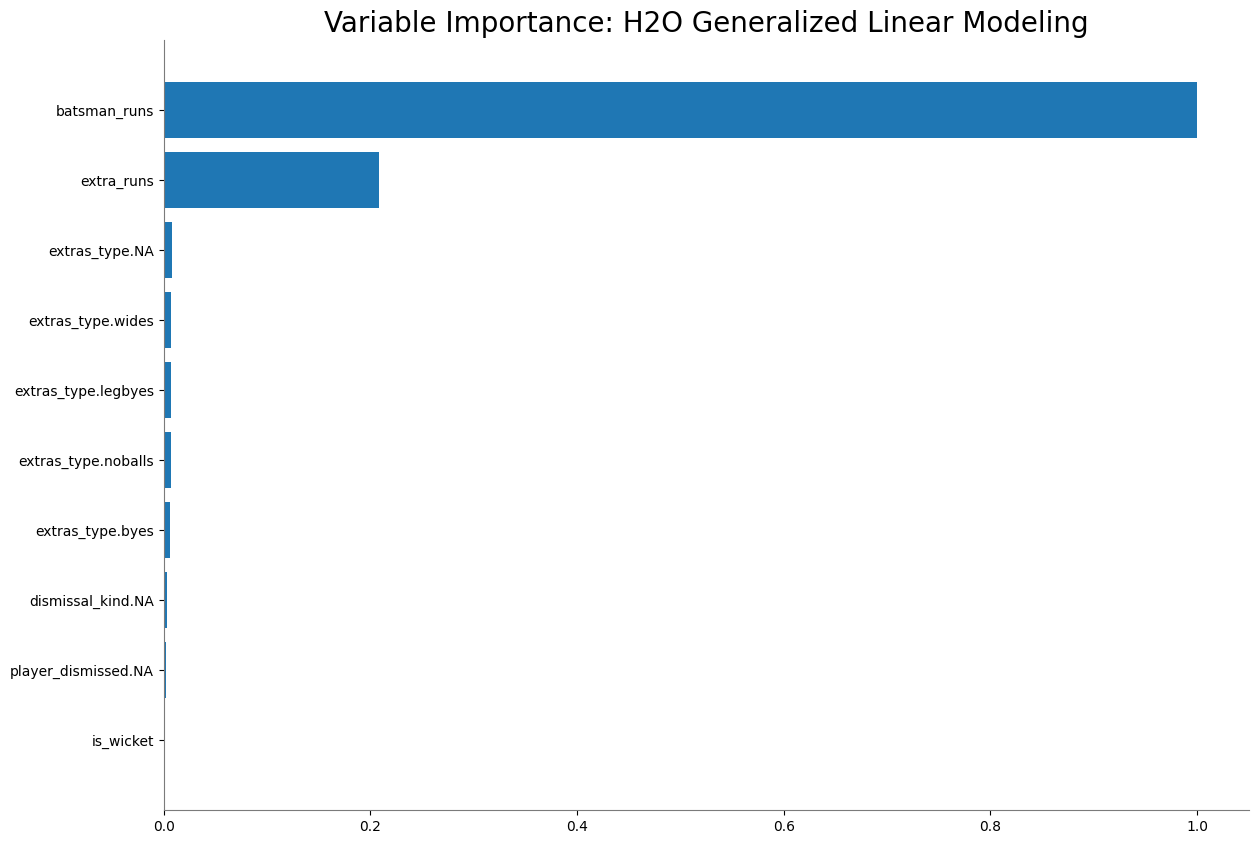

<Figure size 640x480 with 0 Axes>

In [170]:
%matplotlib inline
best_model.varimp_plot()

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

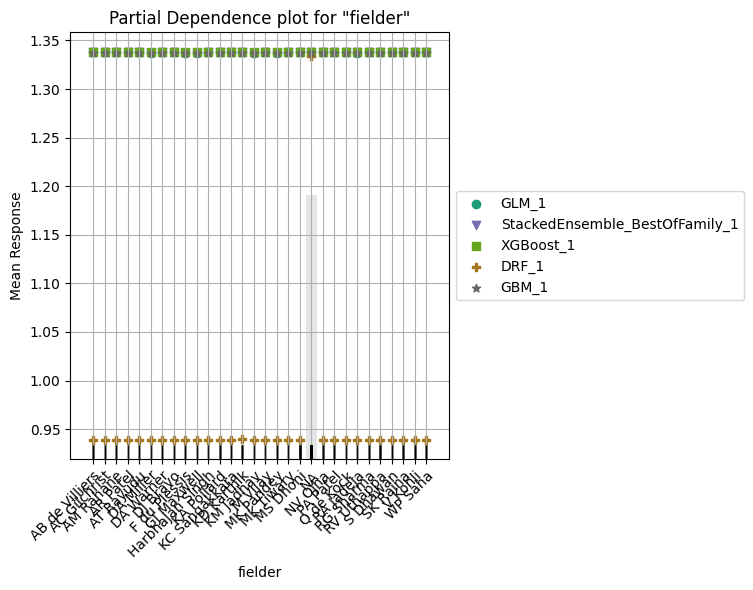

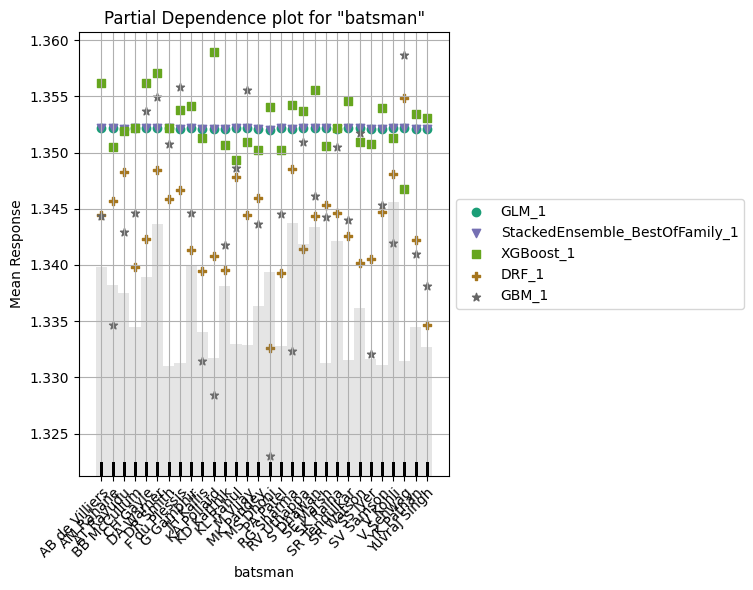

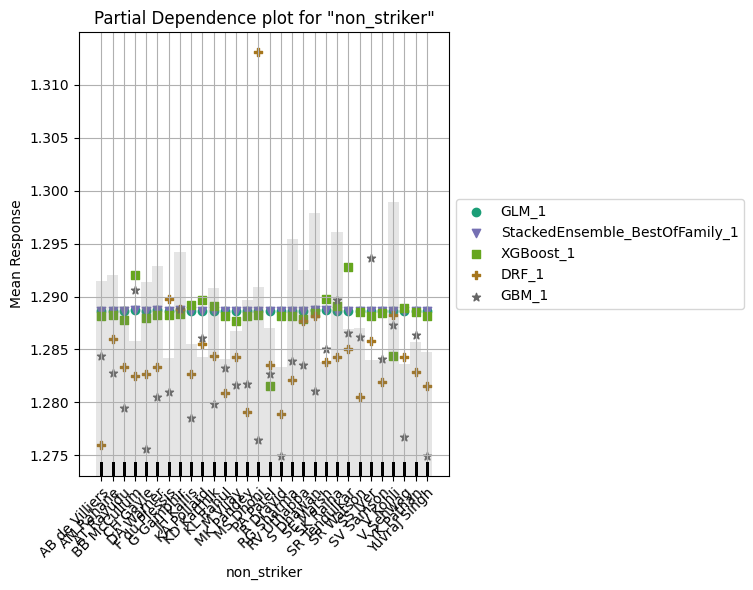

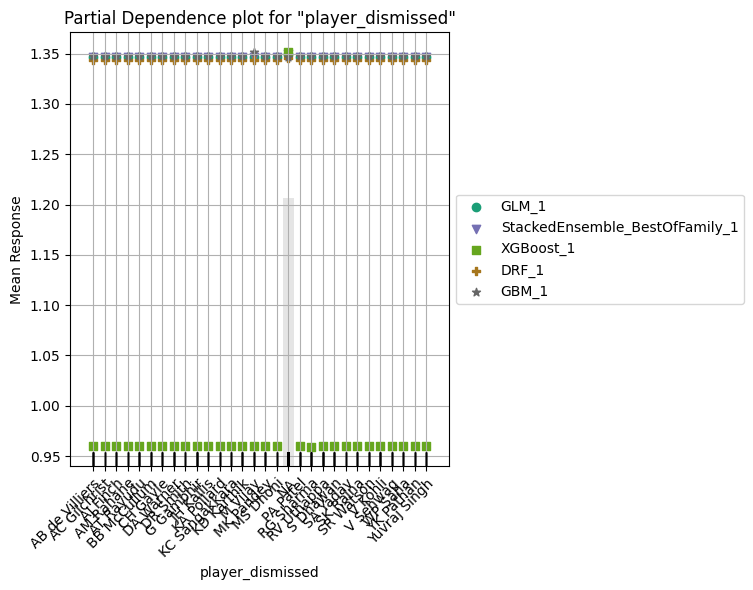

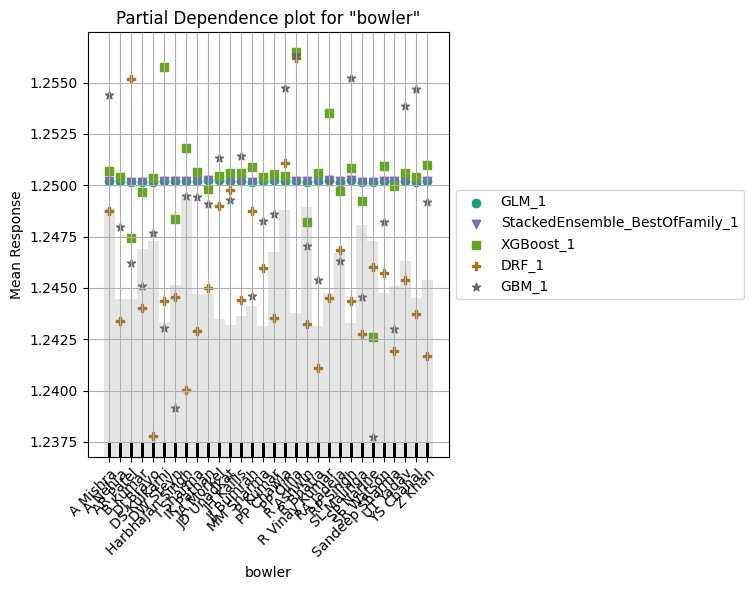

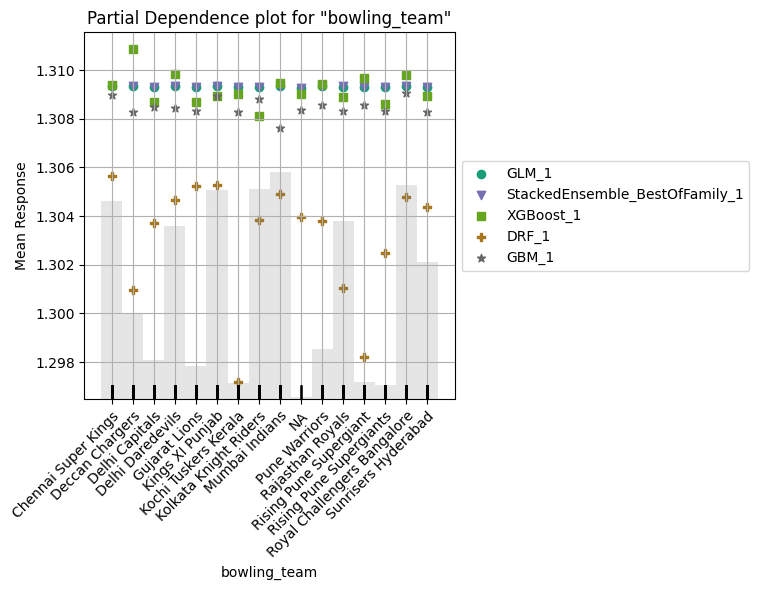

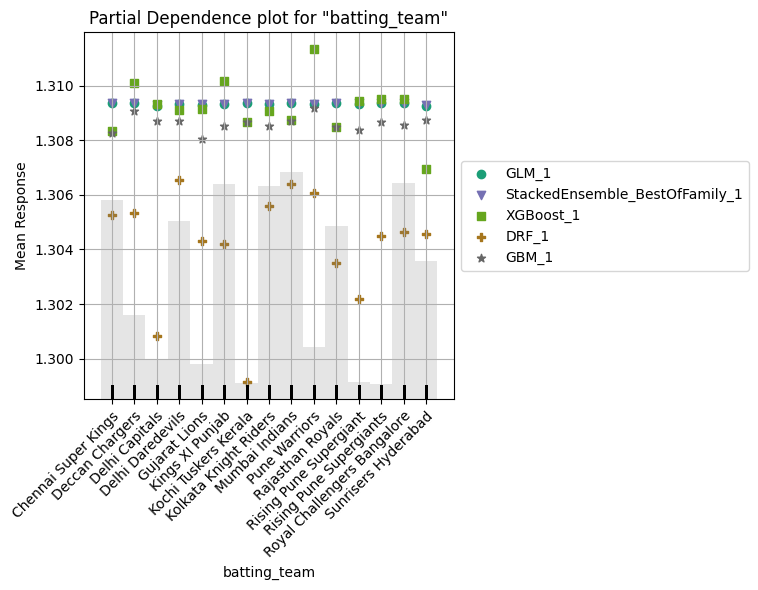

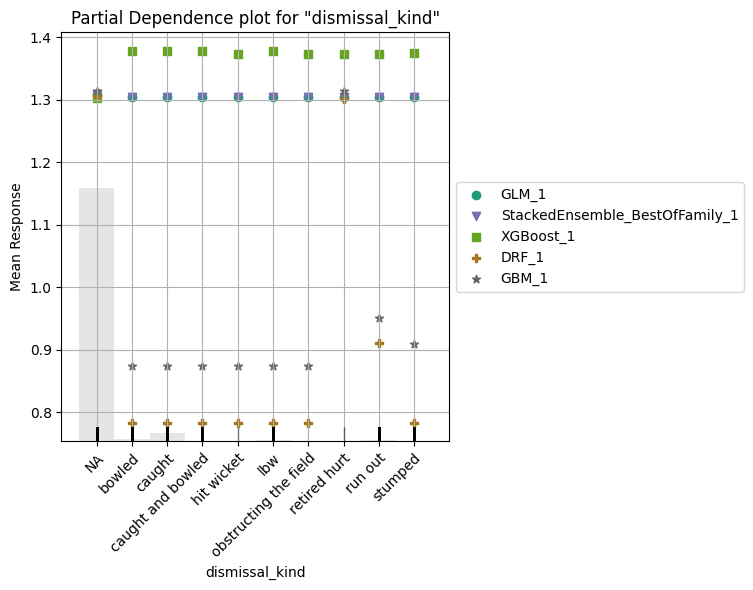

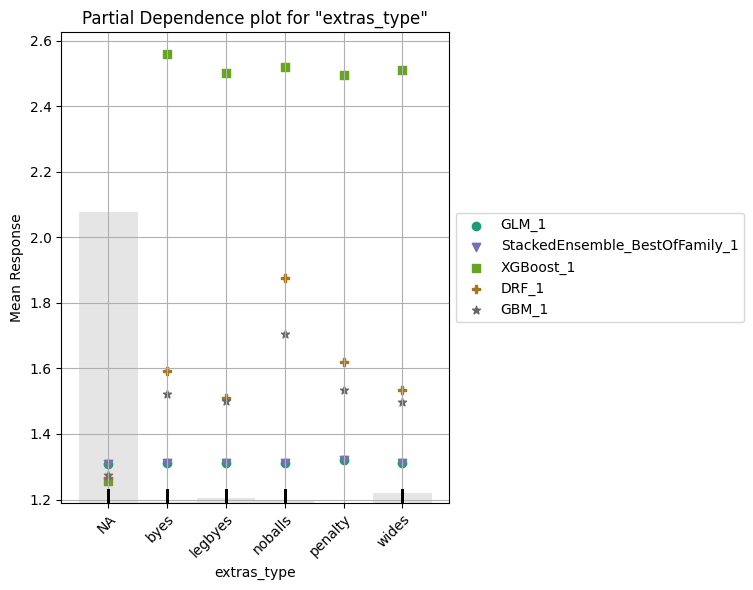

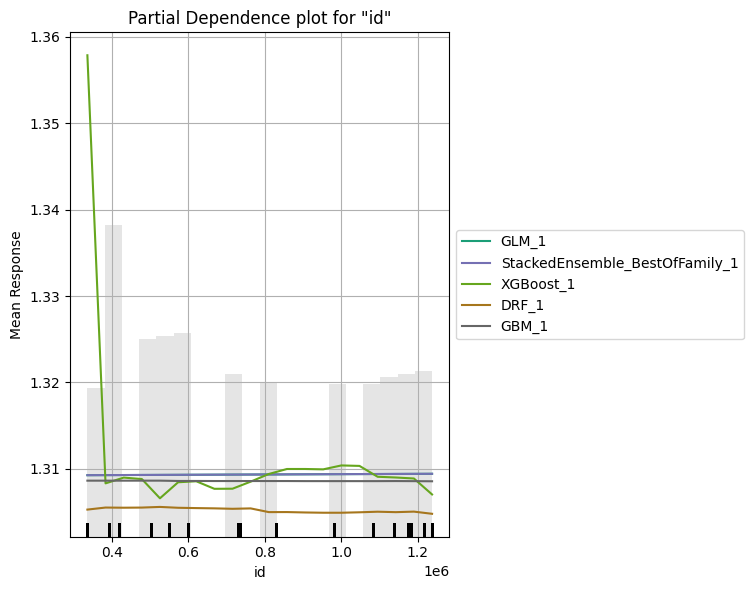

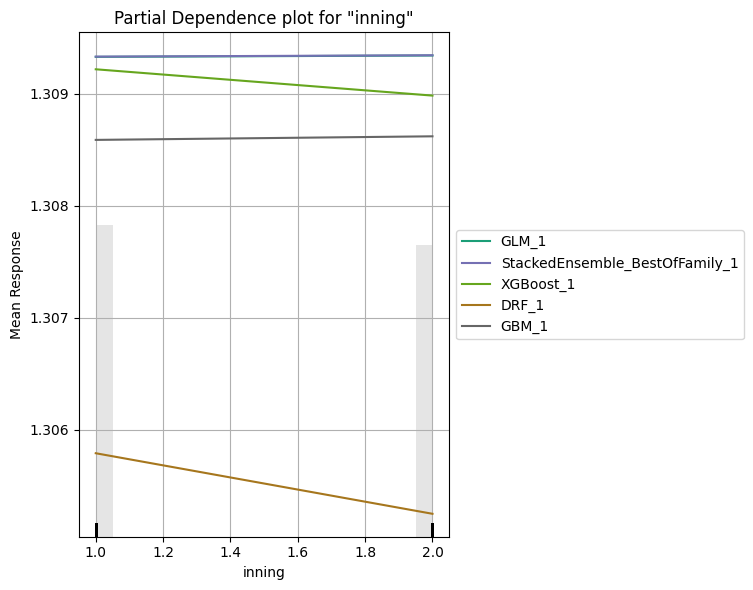

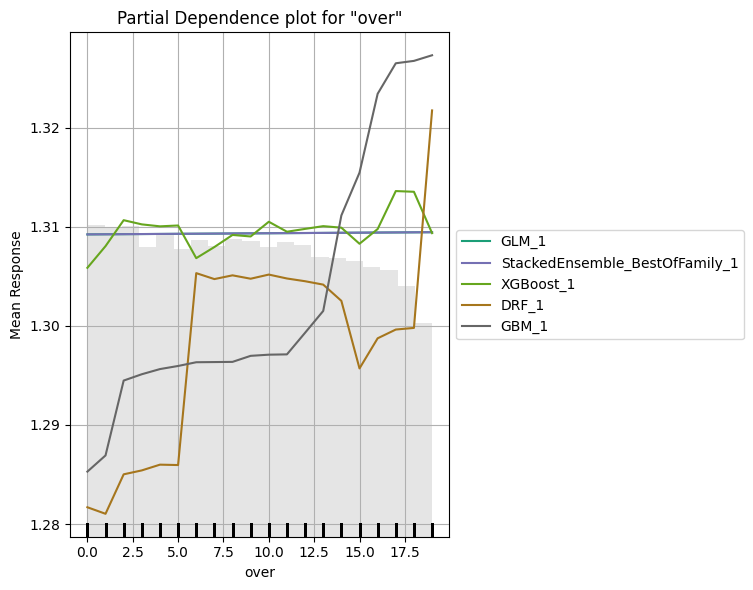

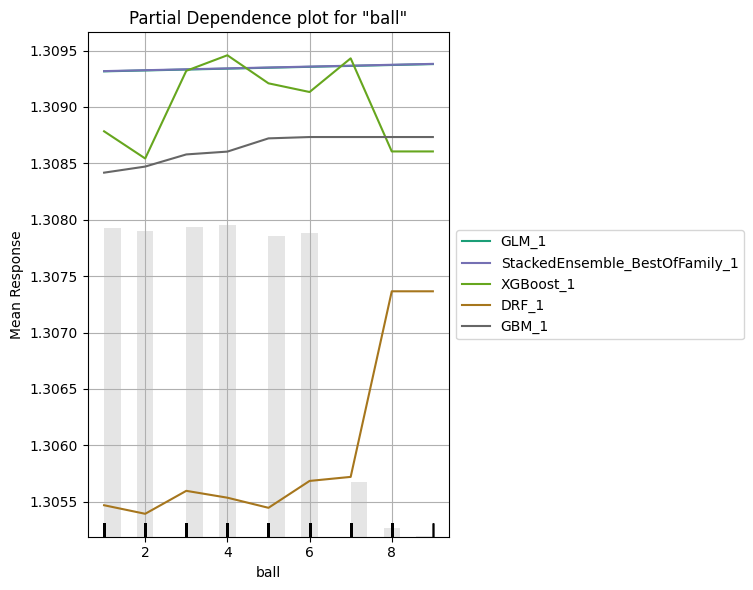

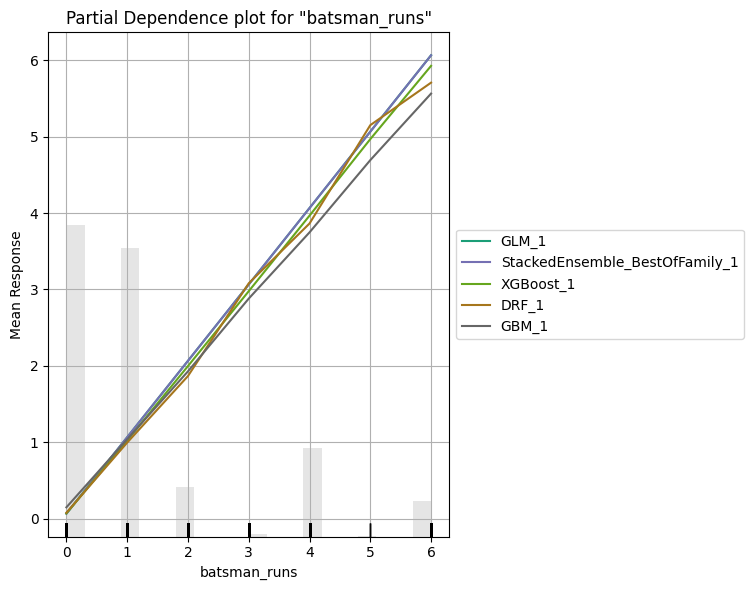

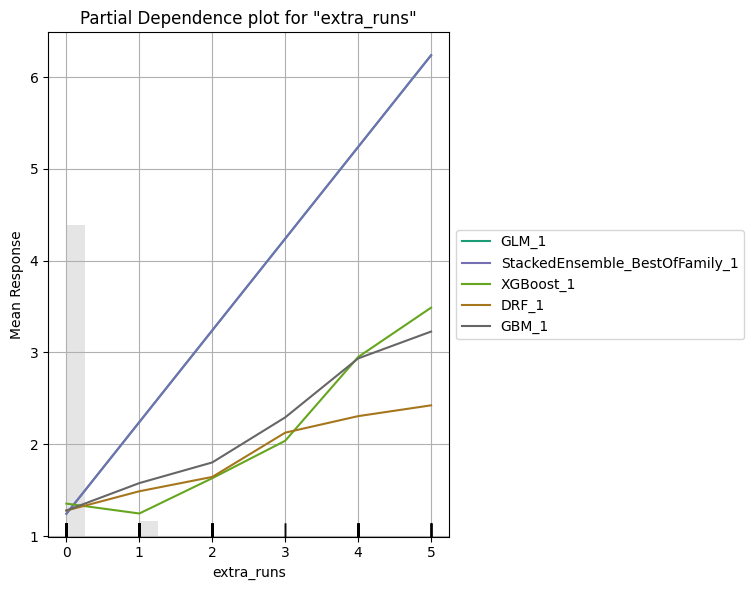

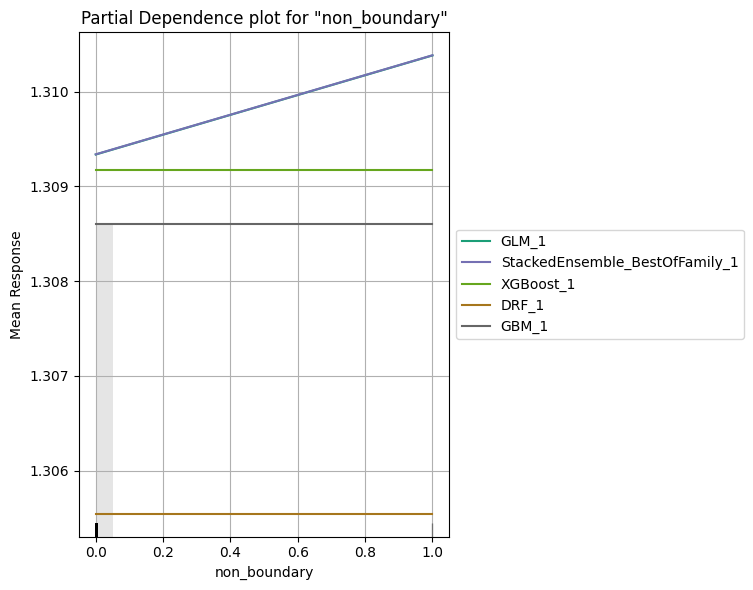

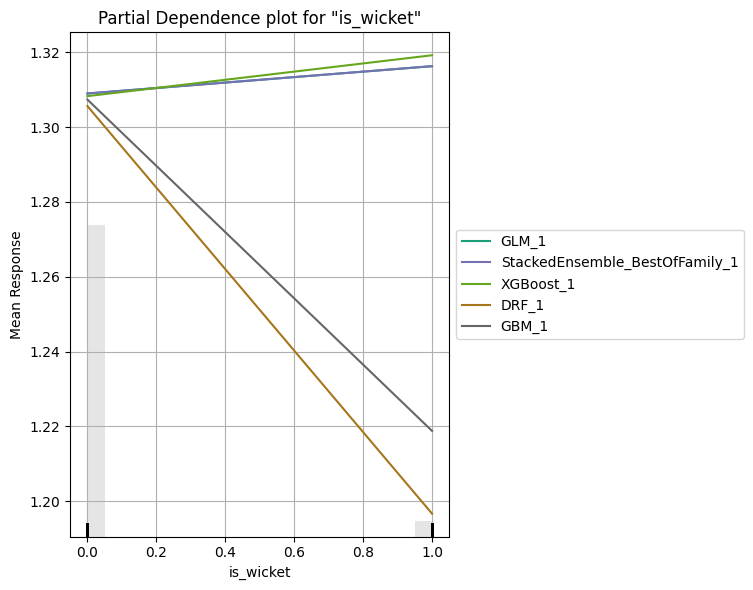

In [171]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

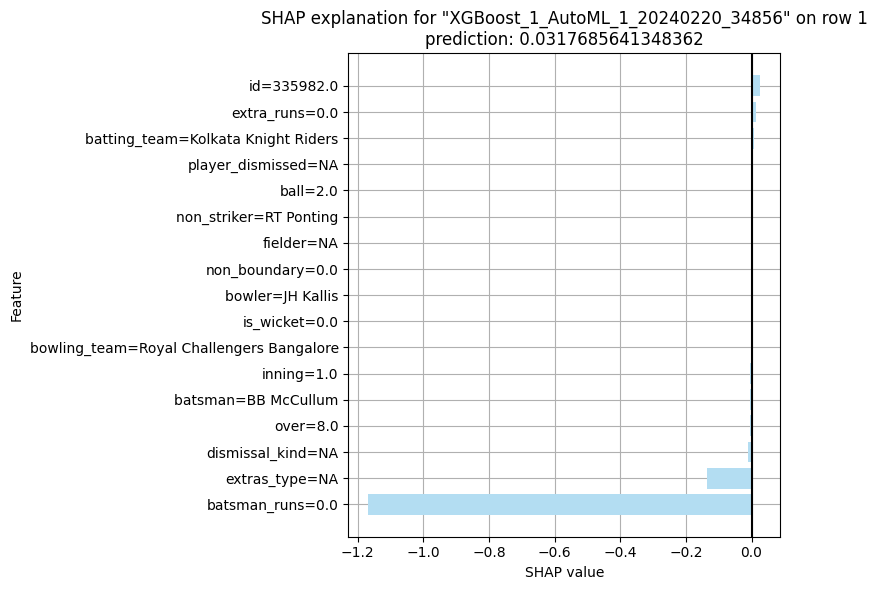

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

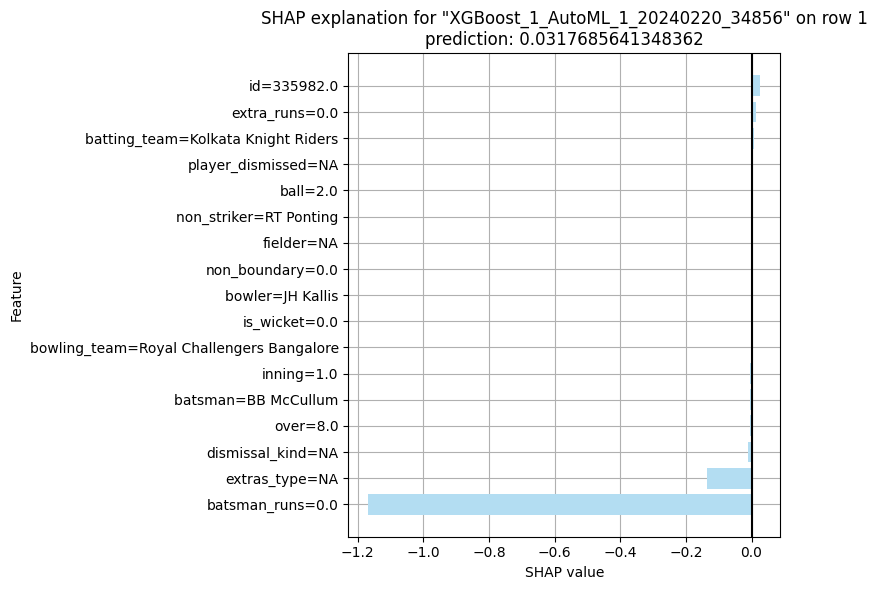

In [172]:
aml.explain_row(frame = test, row_index = 1, figsize = (8,6), exclude_explanations = "leaderboard")

Is the relationship significant?
The variable importance plot suggests that some variables have a stronger relationship with the target variable than others, especially 'player_of_match' the performance metrics (MSE, RMSE, LogLoss), there seems to be a significant relationship captured by the model.


Are any model assumptions violated?
Gradient Boosting Machines do not assume linearity or normal distribution of the variables. They can handle non-linear relationships and interactions between variables. The primary assumption is that errors are independent.


Is there any multicollinearity in the model?
GBM models are generally robust to multicollinearity because they use decision trees that do not require independent predictor variables.


In the multivariate models are predictor variables independent of all the other predictor variables?

The independence of predictor variables is not a requirement for GBM models. They can capture complex interactions between variables.

From the variable importance plot, 'player_of_match' is the most significant predictor variable, followed by 'team1', 'umpire2', and so on. Variables like 'date' and 'id' seem to be the least important and could be candidates for exclusion to simplify the model.


Does the model make sense?
the fact that the top-10 hit ratios are very high, the model seems to be making sensible predictions. However, the practical interpretability of variables like 'player_of_match' in a predictive model needs further scrutiny, as it sounds like a post-match feature rather than a predictor.


Does regularization help?
no, the rmse from the best model is 0.067, however, in regularization, the rmse is 0.2


Which independent variables are significant?
According to the variable importance plot, 'player_of_match', 'team1', 'umpire2', 'toss_winner', and 'team2' are the most significant independent variables.


Which hyperparameters are important?
All hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

# Ridge Regularization in H20

In [173]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# set the response column and predictor columns
response_col = "is_wicket"
predictor_cols = df.columns
predictor_cols.remove("is_wicket")

# create a logistic regression model with Ridge regularization
glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=0, lambda_=0.1)

# train the model on your data
glm.train(x=predictor_cols, y=response_col, training_frame=train)

# view the model performance metrics
print(glm.model_performance())

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning:

We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.



██████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.035760986517059716
RMSE: 0.18910575484913122
LogLoss: 0.12956083688966125
AUC: 0.9998589268490415
AUCPR: 0.9997678190938608
Gini: 0.9997178536980831
Null degrees of freedom: 154810
Residual degrees of freedom: 151993
Null deviance: 60752.79640462212
Residual deviance: 40114.88543945069
AIC: 45750.88543945069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07671076987040022
       0       1     Error    Rate
-----  ------  ----  -------  --------------
0      147191  0     0        (0.0/147191.0)
1      2       7618  0.0003   (2.0/7620.0)
Total  147193  7618  0        (2.0/154811.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0767108    0.999869  146
max f2                       0.07

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_1_20240220_34856,0.000366589,1.34387e-07,0.000228953,0.000152718,1.34387e-07,11058,0.0014,GLM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_34856,0.000416884,1.73792e-07,0.000271791,0.000179329,1.73792e-07,4050,0.00178,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_34856,0.0091616,8.39349e-05,0.00499349,0.00516994,8.39349e-05,1794,0.039933,StackedEnsemble
XGBoost_1_AutoML_1_20240220_34856,0.0337318,0.00113784,0.0166204,0.0193708,0.00113784,30254,0.007116,XGBoost
DRF_1_AutoML_1_20240220_34856,0.115406,0.0133186,0.0285041,0.0450287,0.0133186,3208,0.003389,DRF
GBM_1_AutoML_1_20240220_34856,0.138148,0.0190849,0.0941247,0.0654759,0.0190849,38850,0.028708,GBM
XGBoost_2_AutoML_1_20240220_34856,0.19451,0.037834,0.12481,0.0765755,0.037834,2560,0.001909,XGBoost
GBM_3_AutoML_1_20240220_34856,0.614366,0.377445,0.449084,0.262537,0.377445,2130,0.005593,GBM
GBM_4_AutoML_1_20240220_34856,0.761225,0.579463,0.556212,0.317988,0.579463,2123,0.00407,GBM
GBM_2_AutoML_1_20240220_34856,0.847152,0.717666,0.619146,0.347537,0.717666,2214,0.003749,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

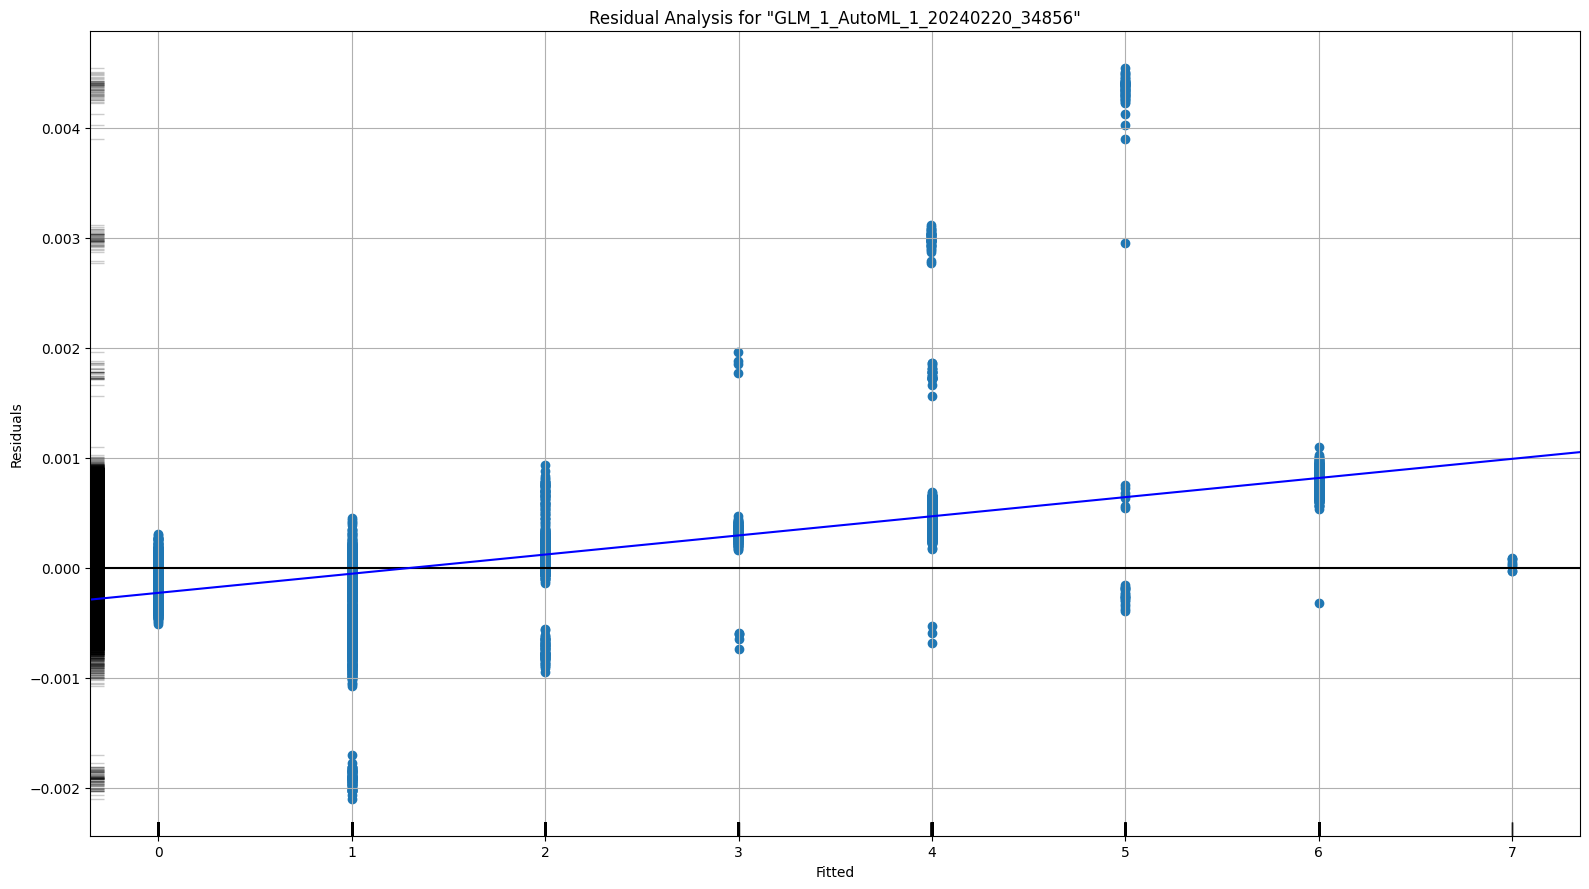

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

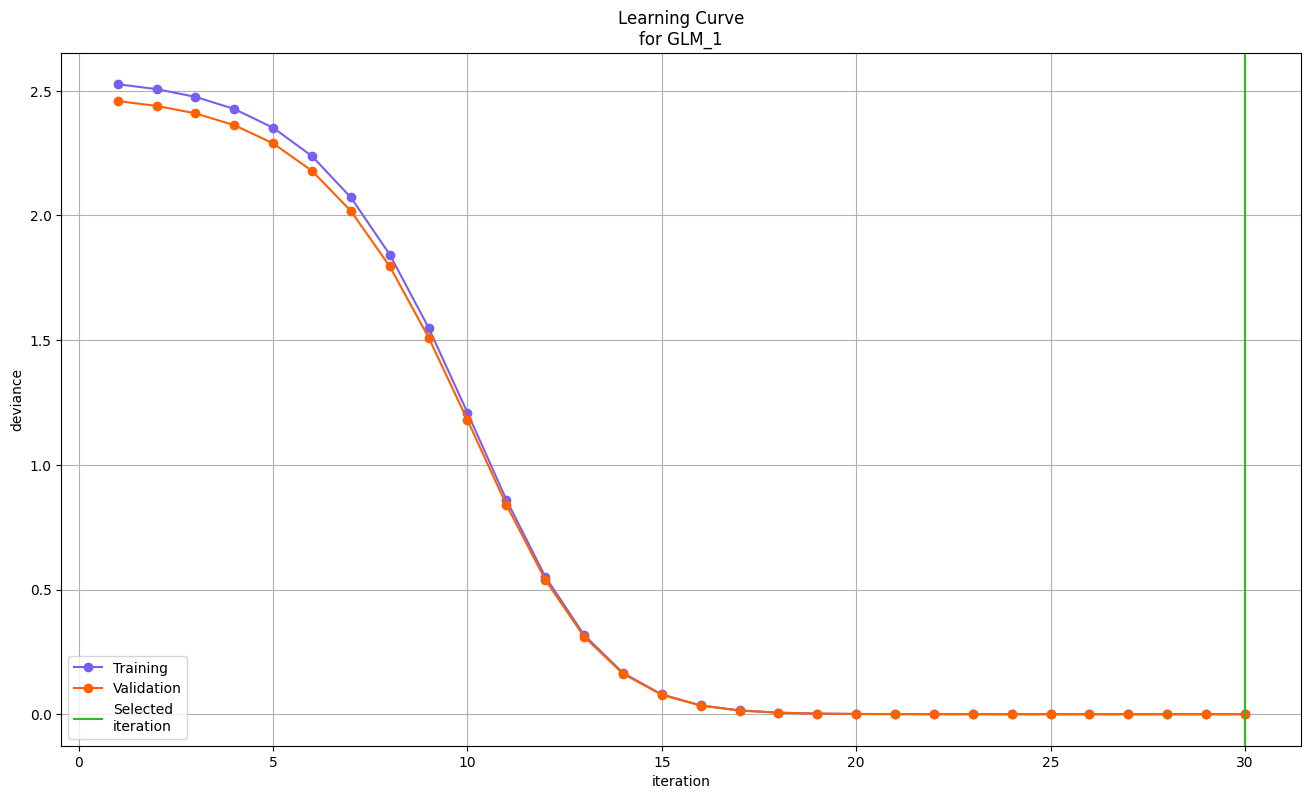

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

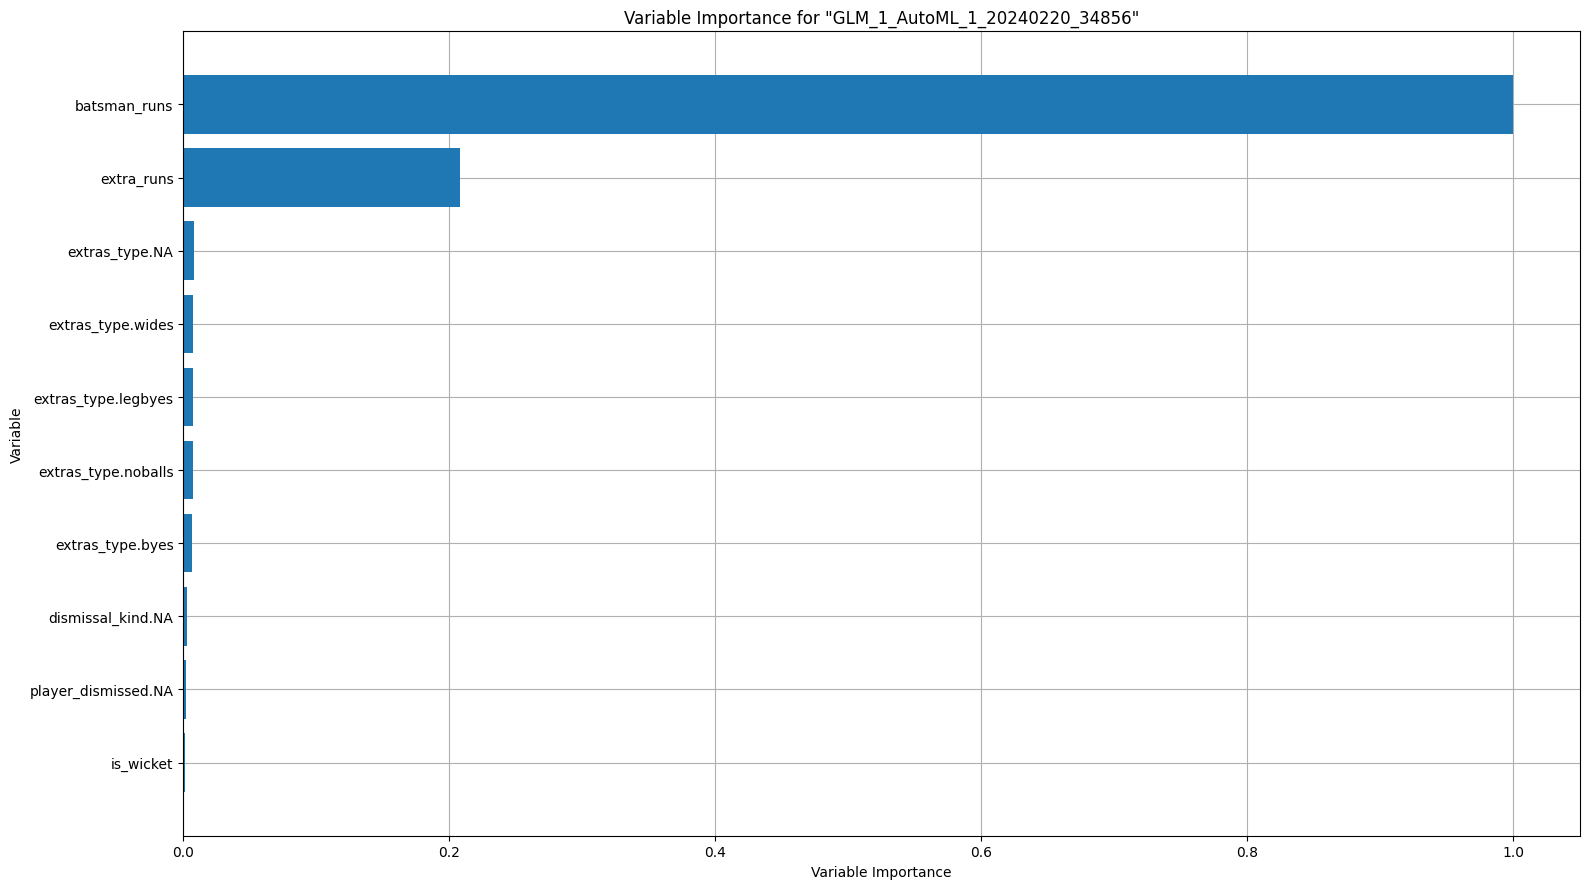

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

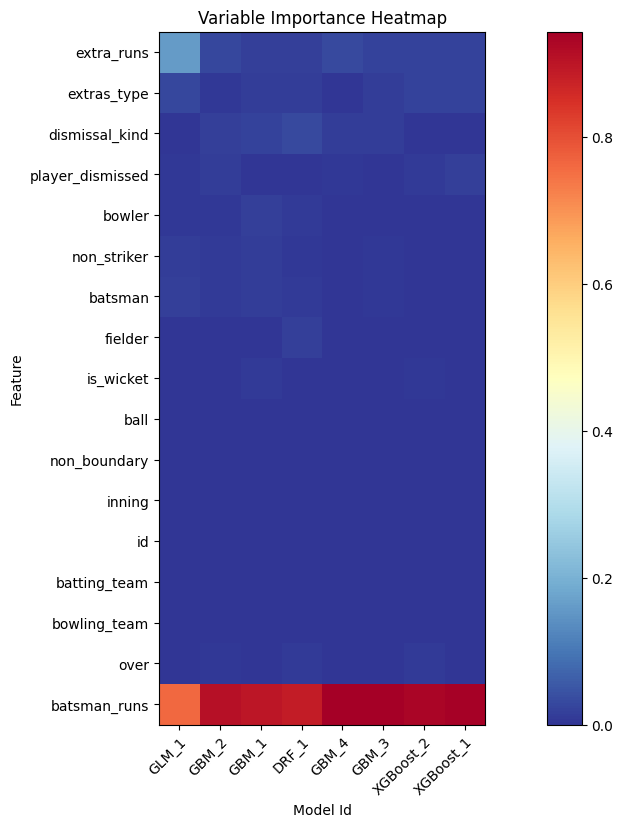

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

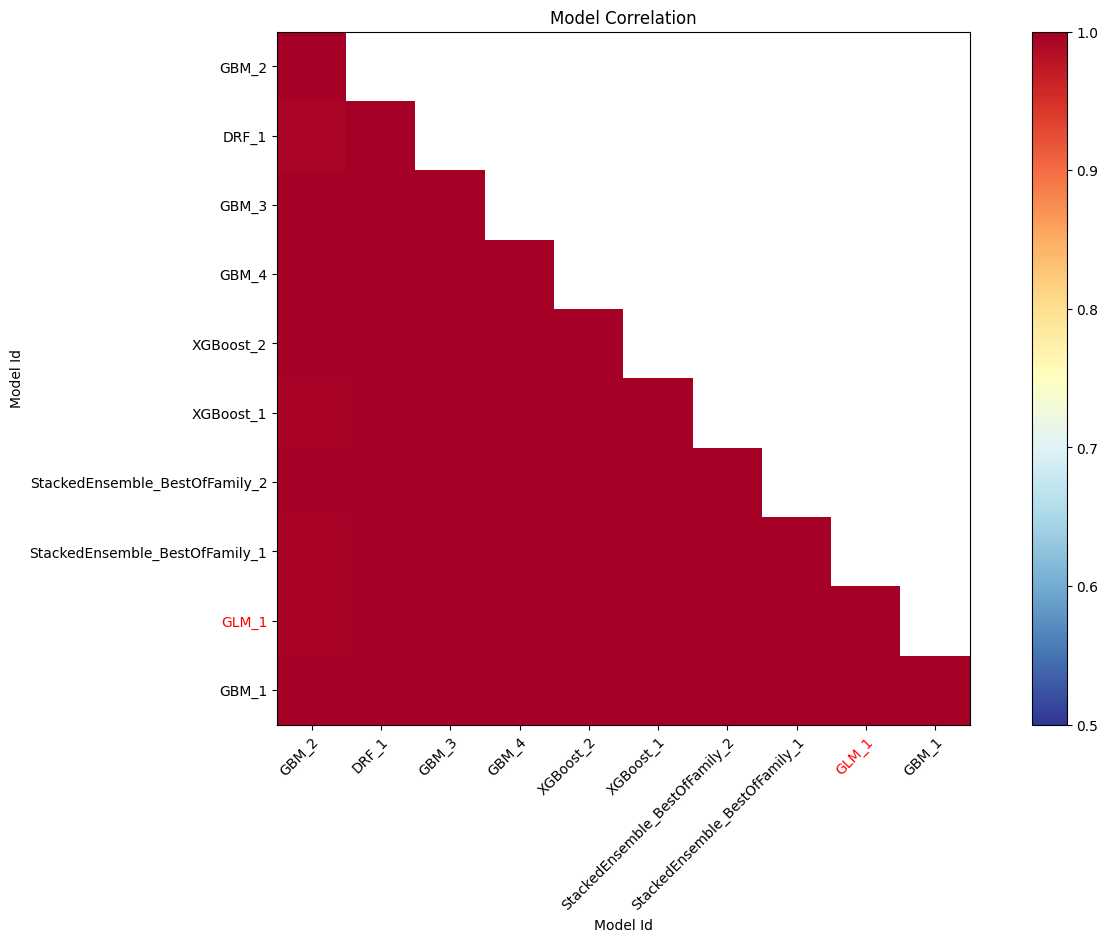

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:611: RuntimeWarning:

invalid value encountered in divide



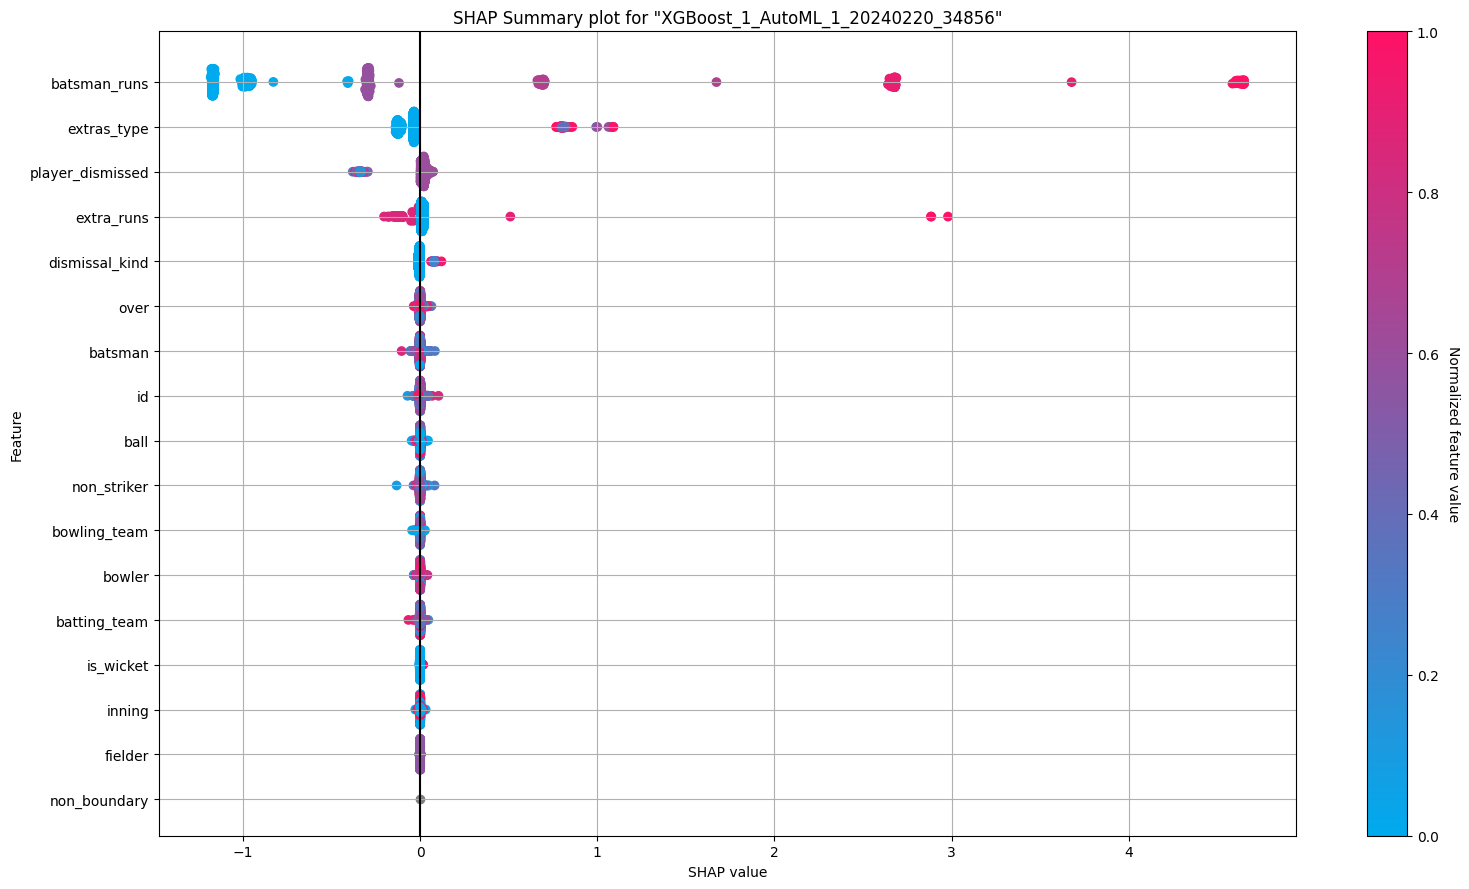

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

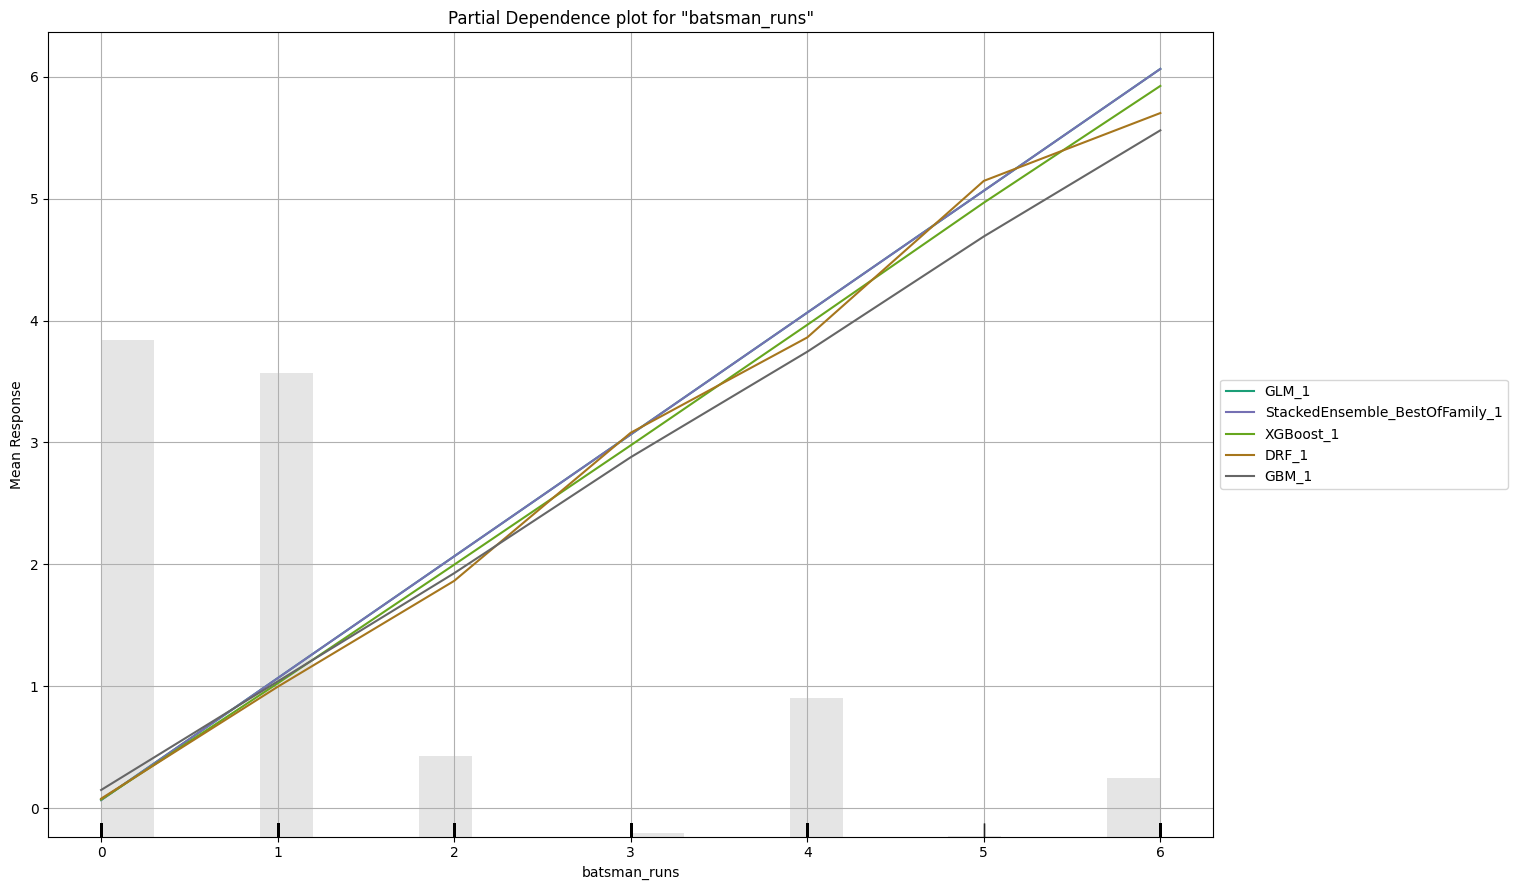

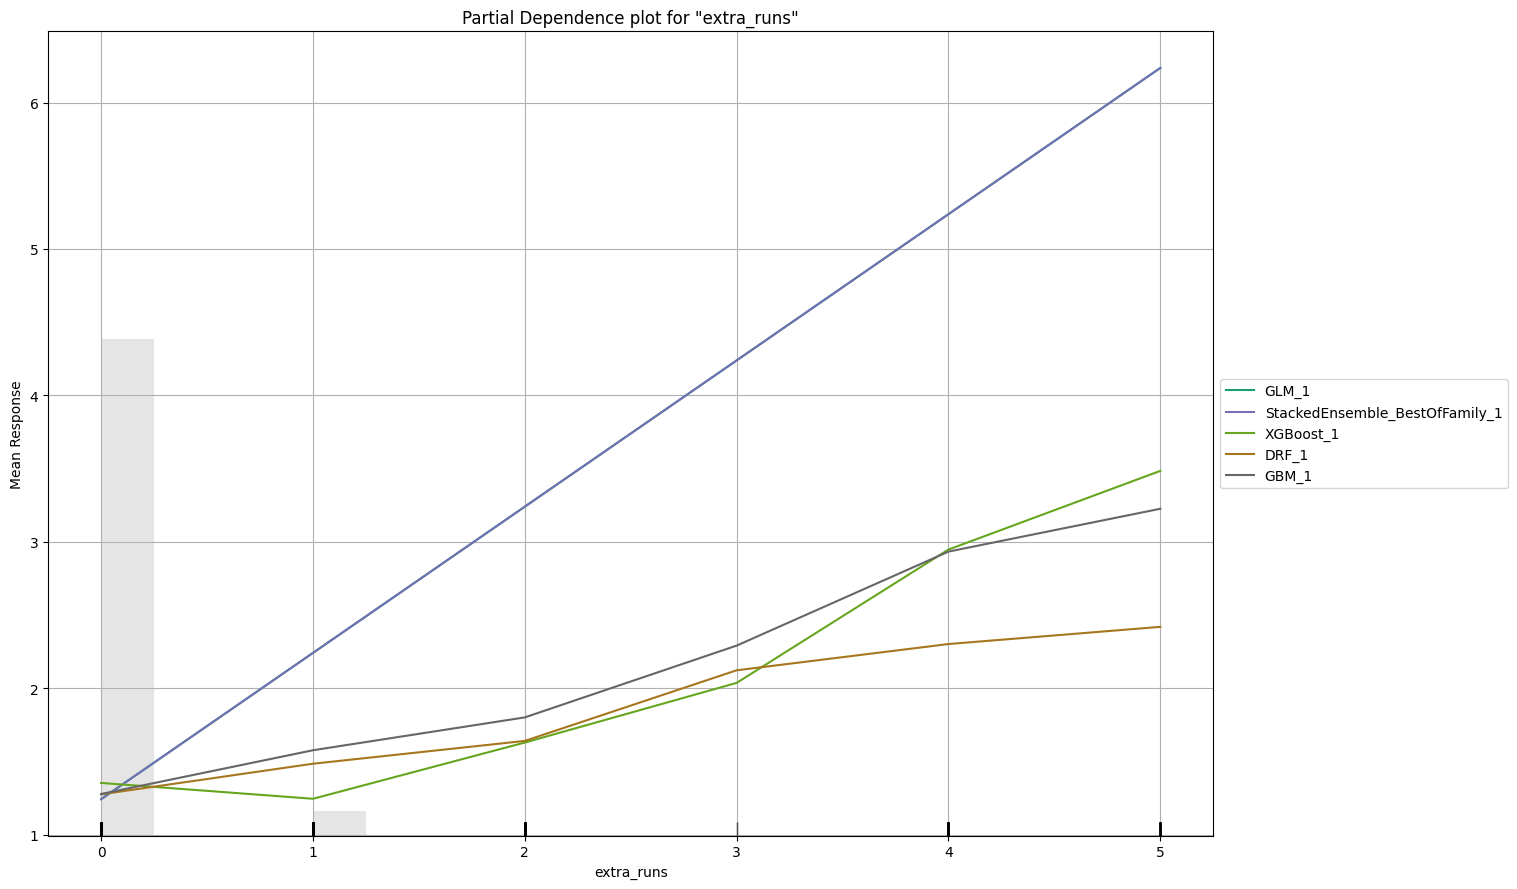

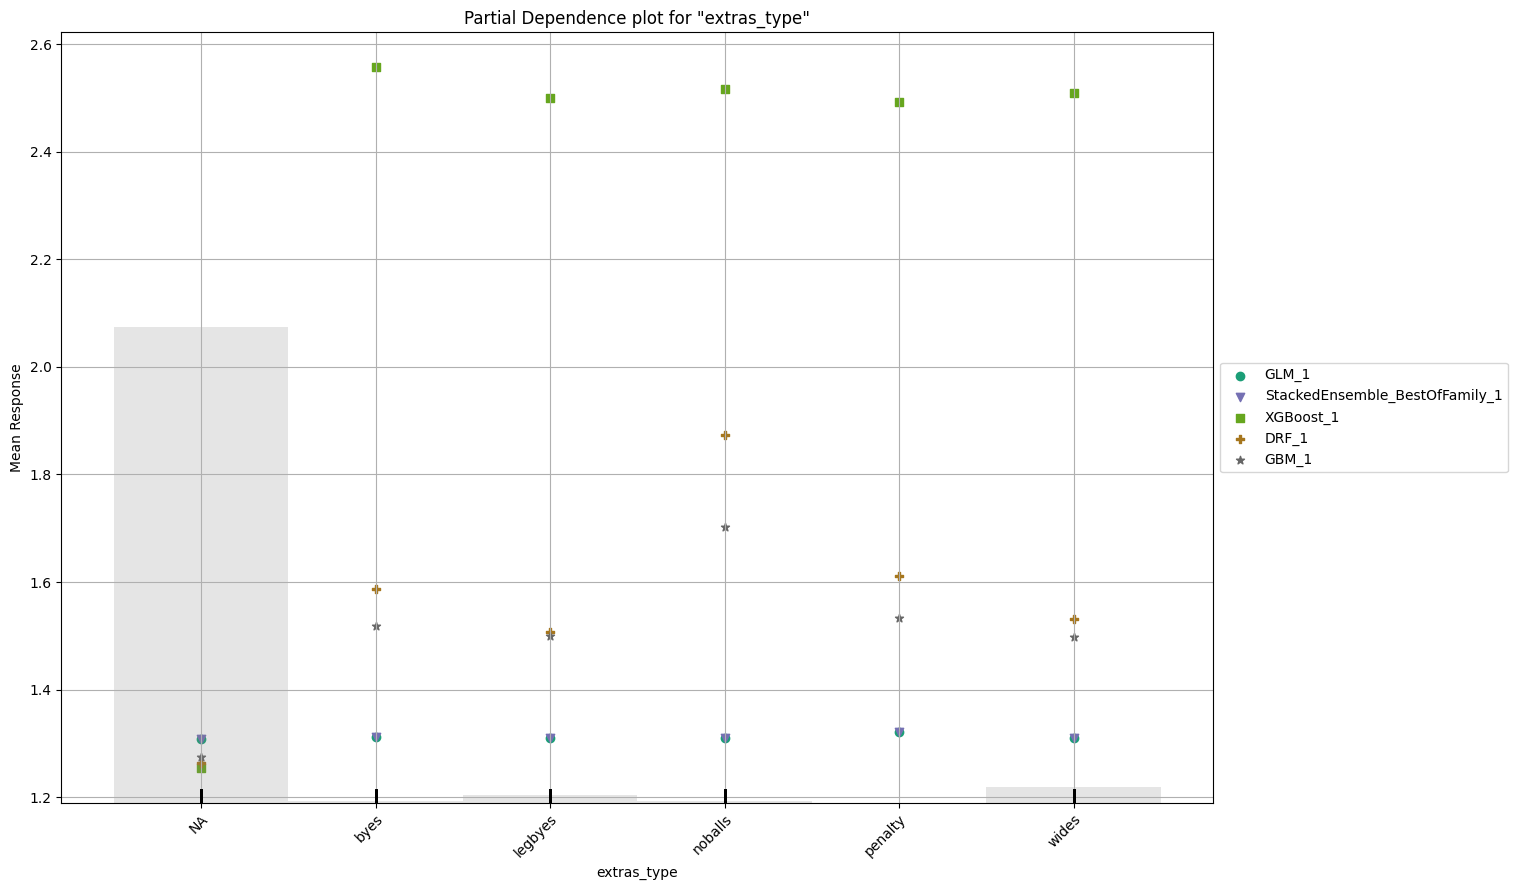

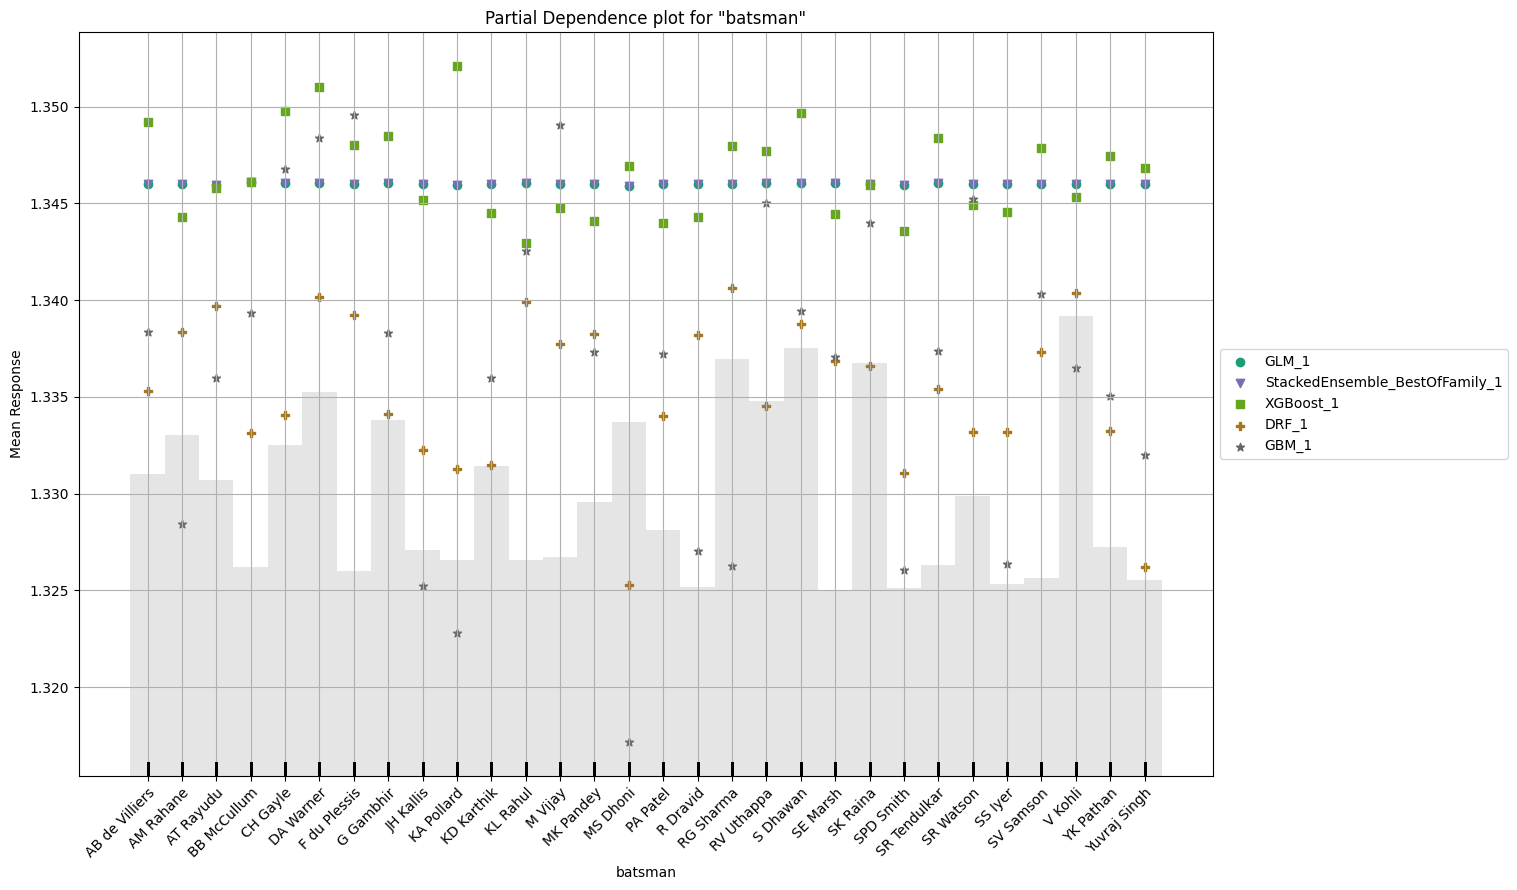

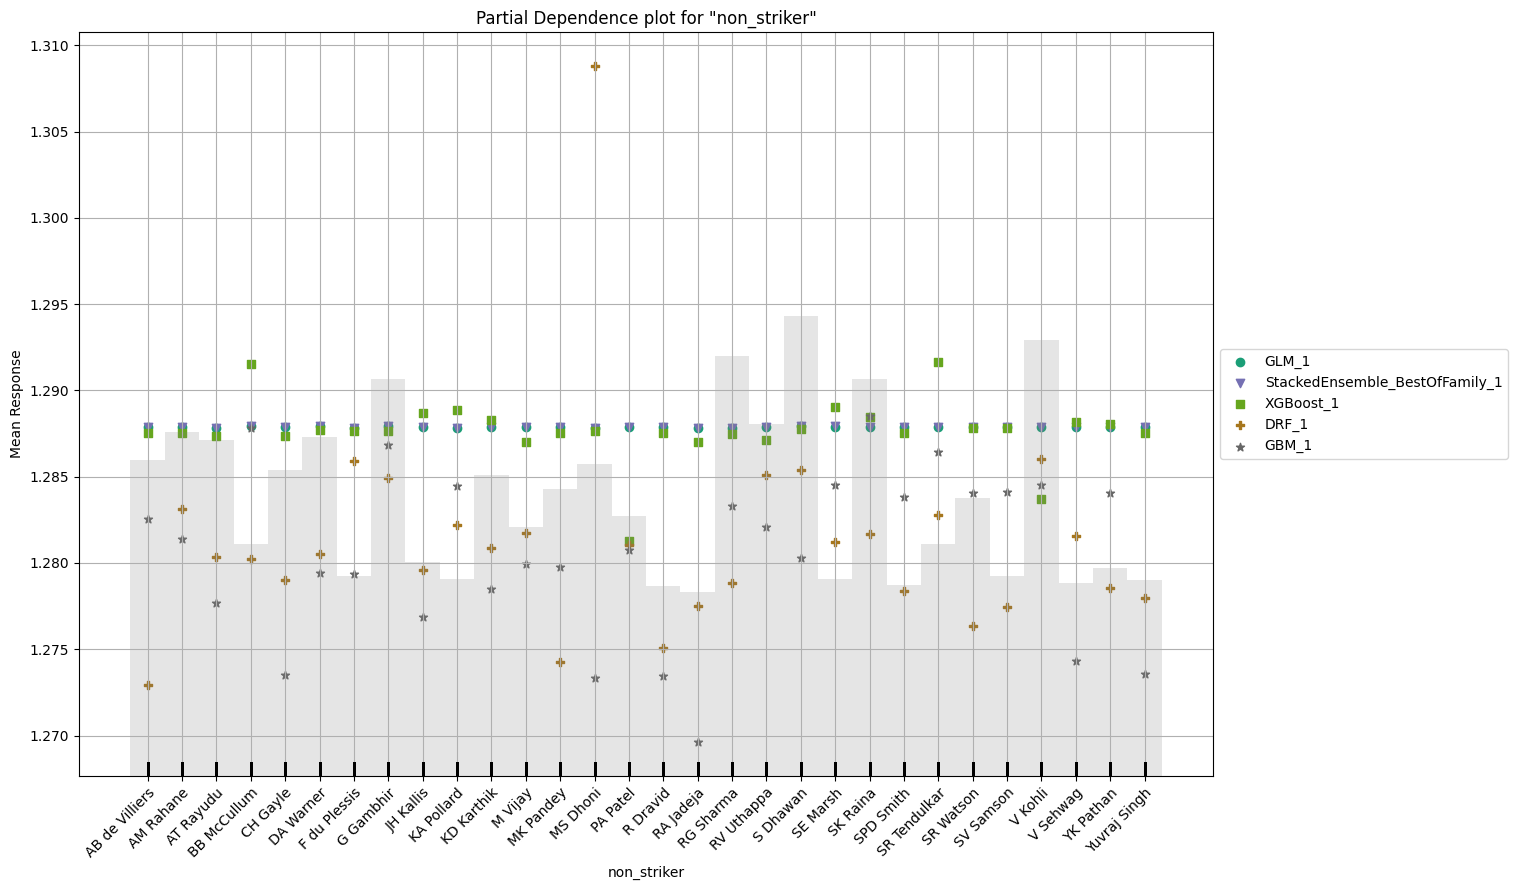

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

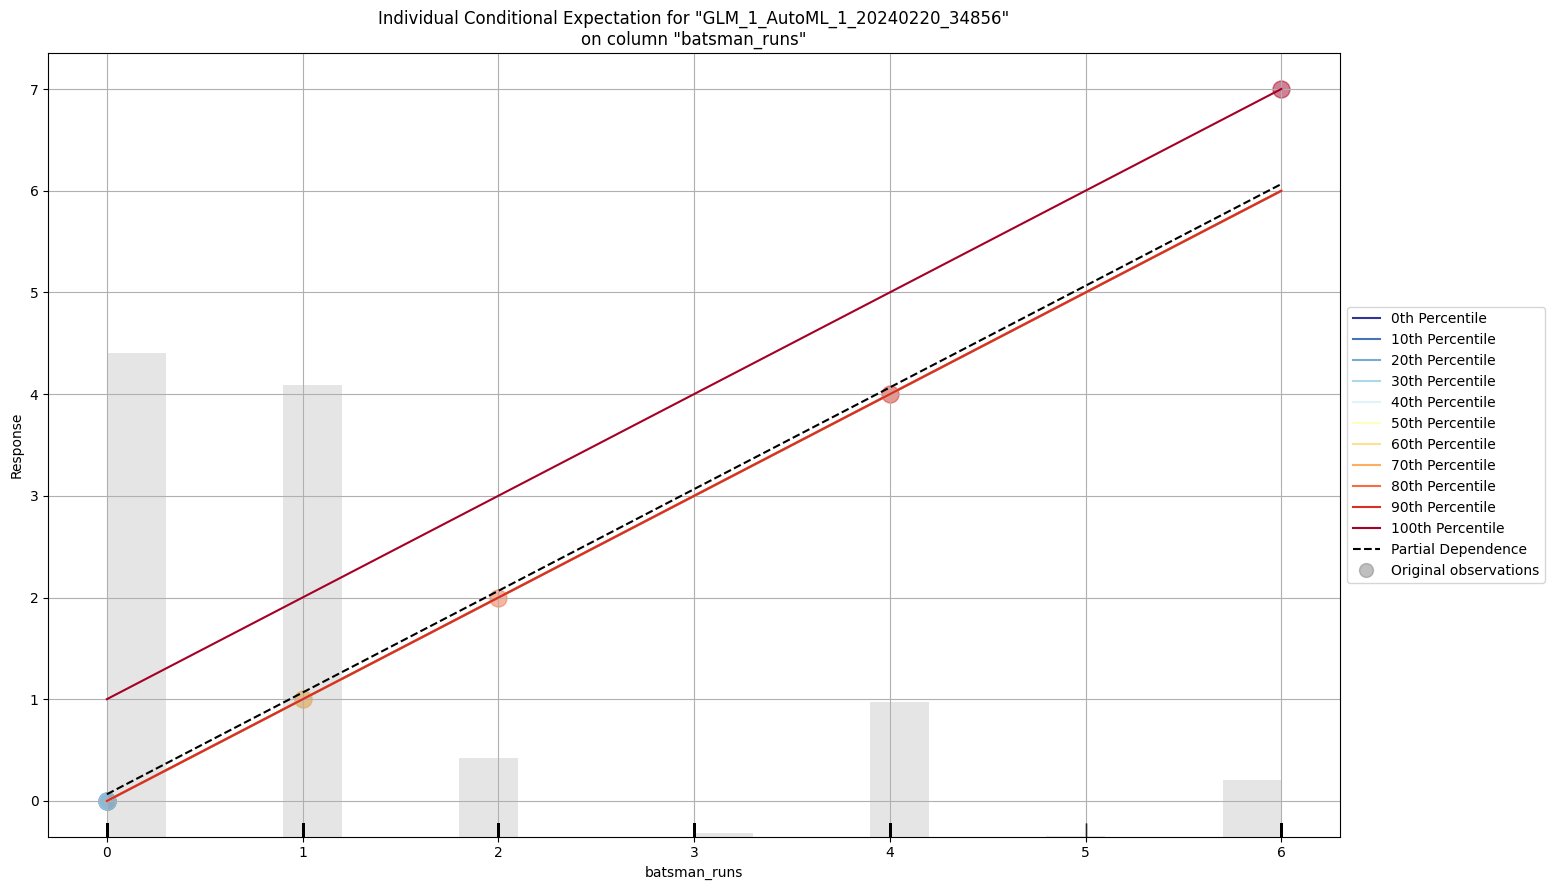

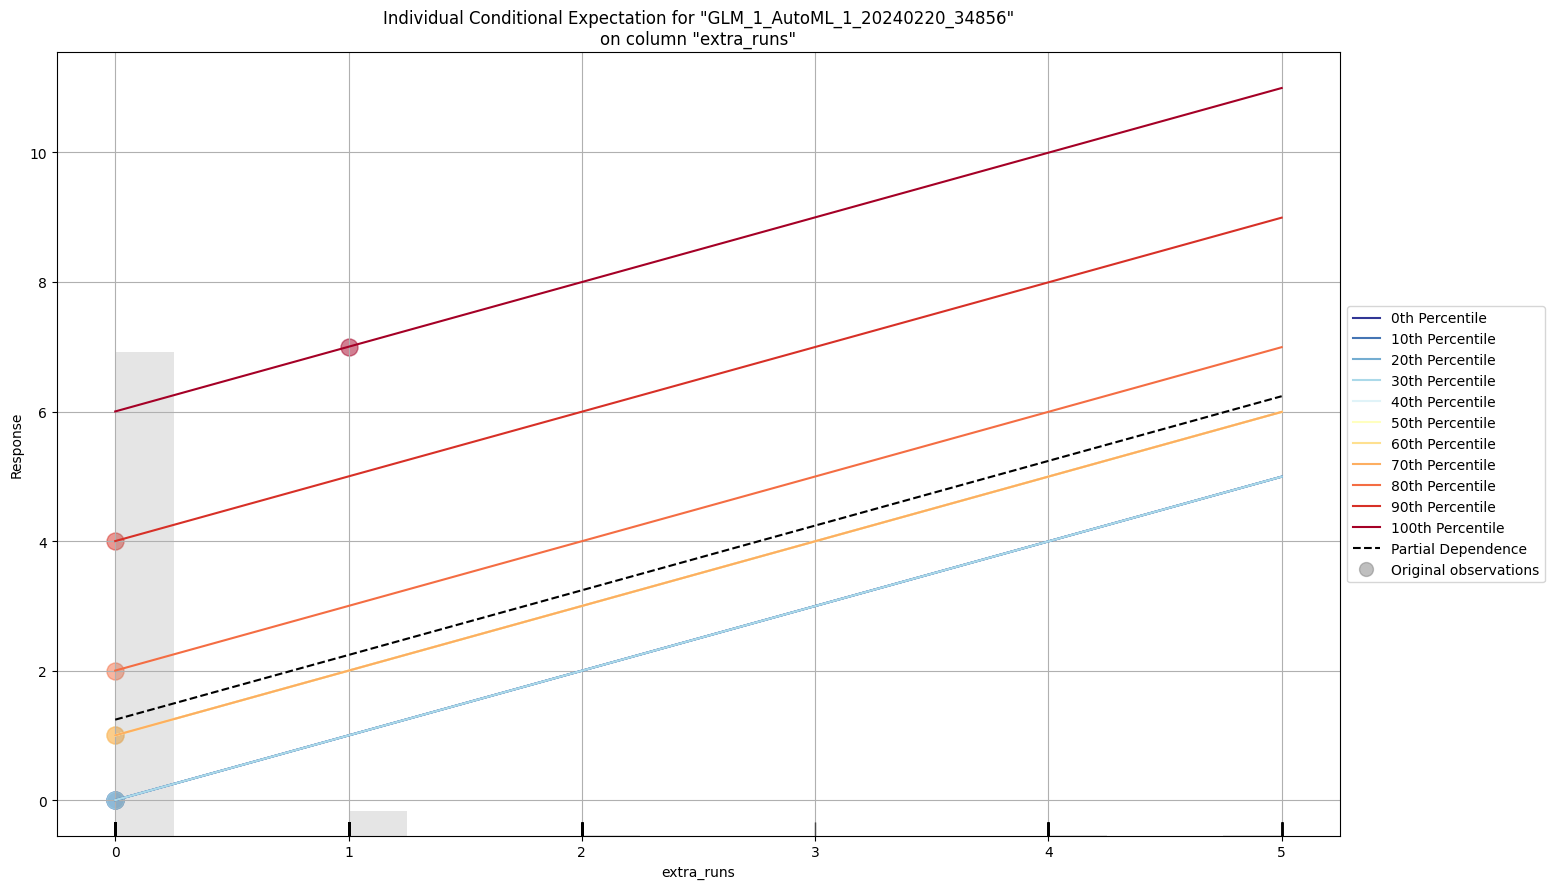

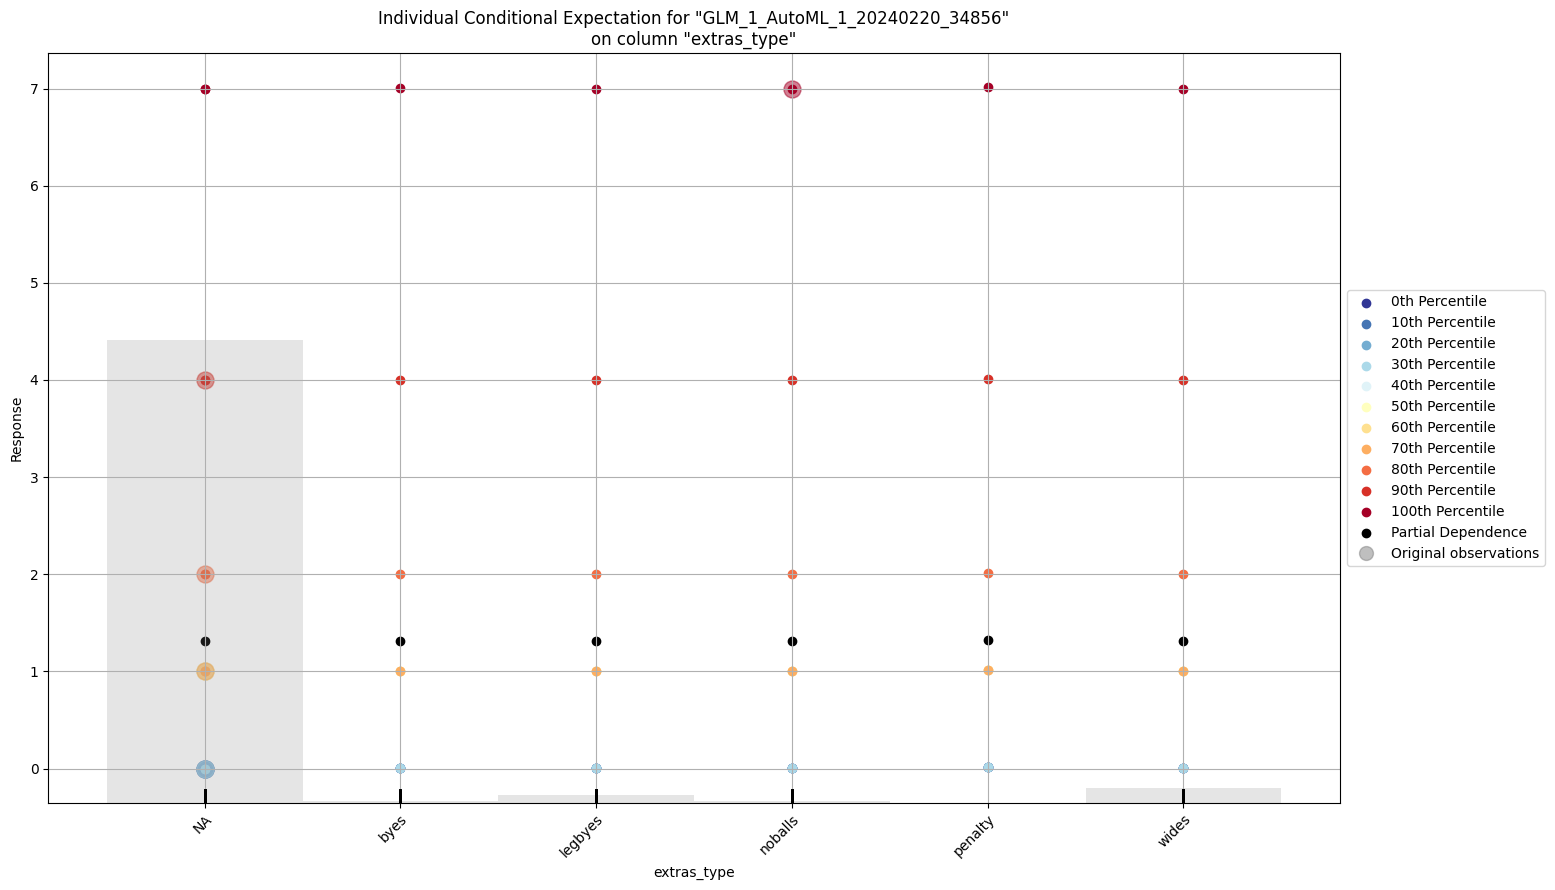

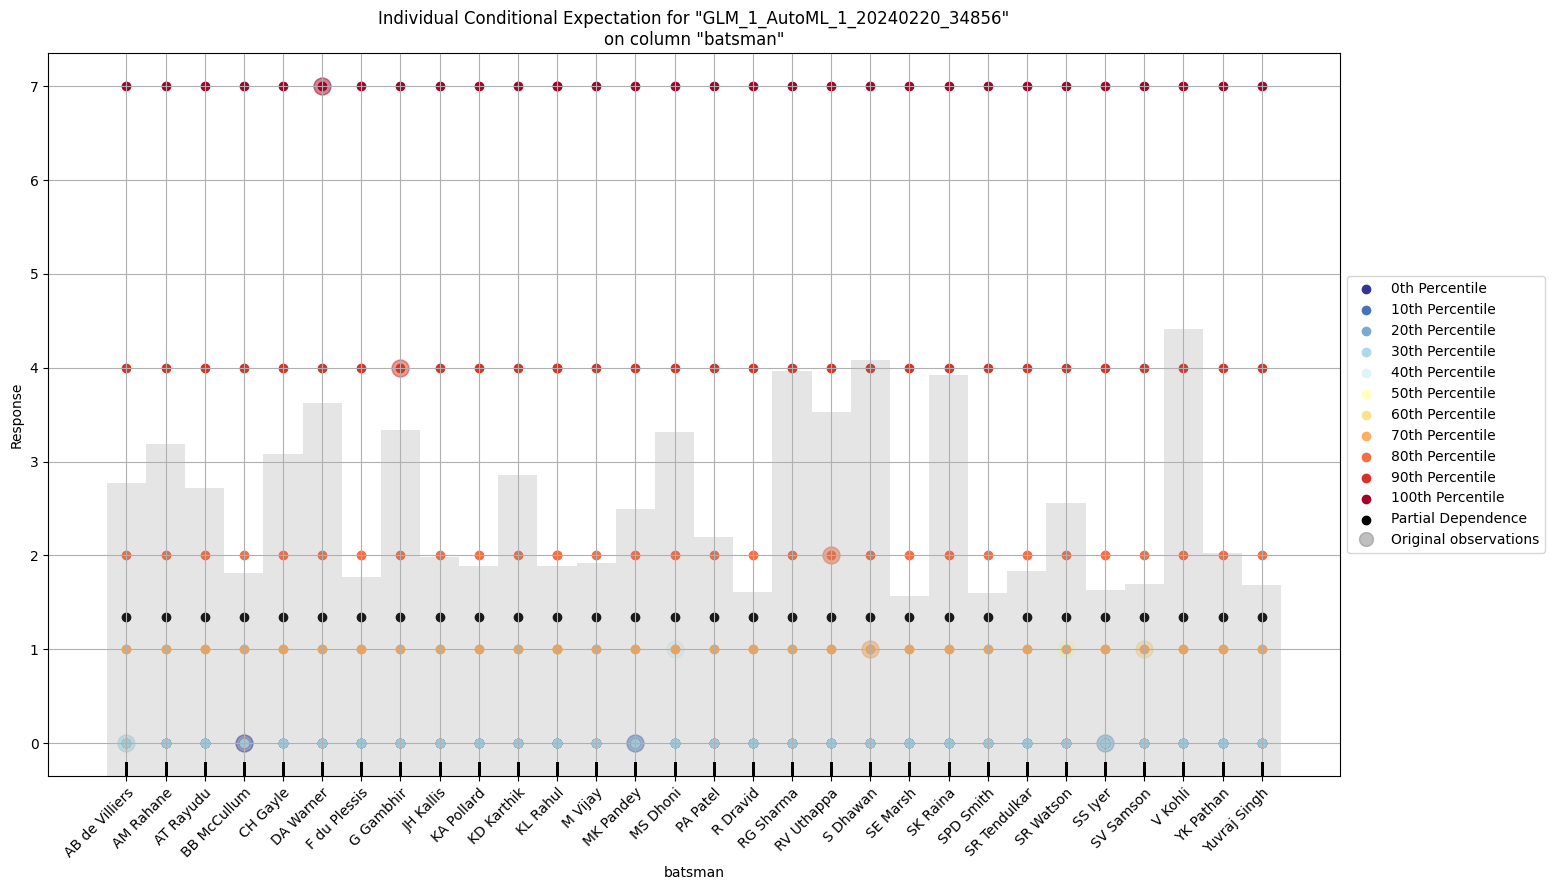

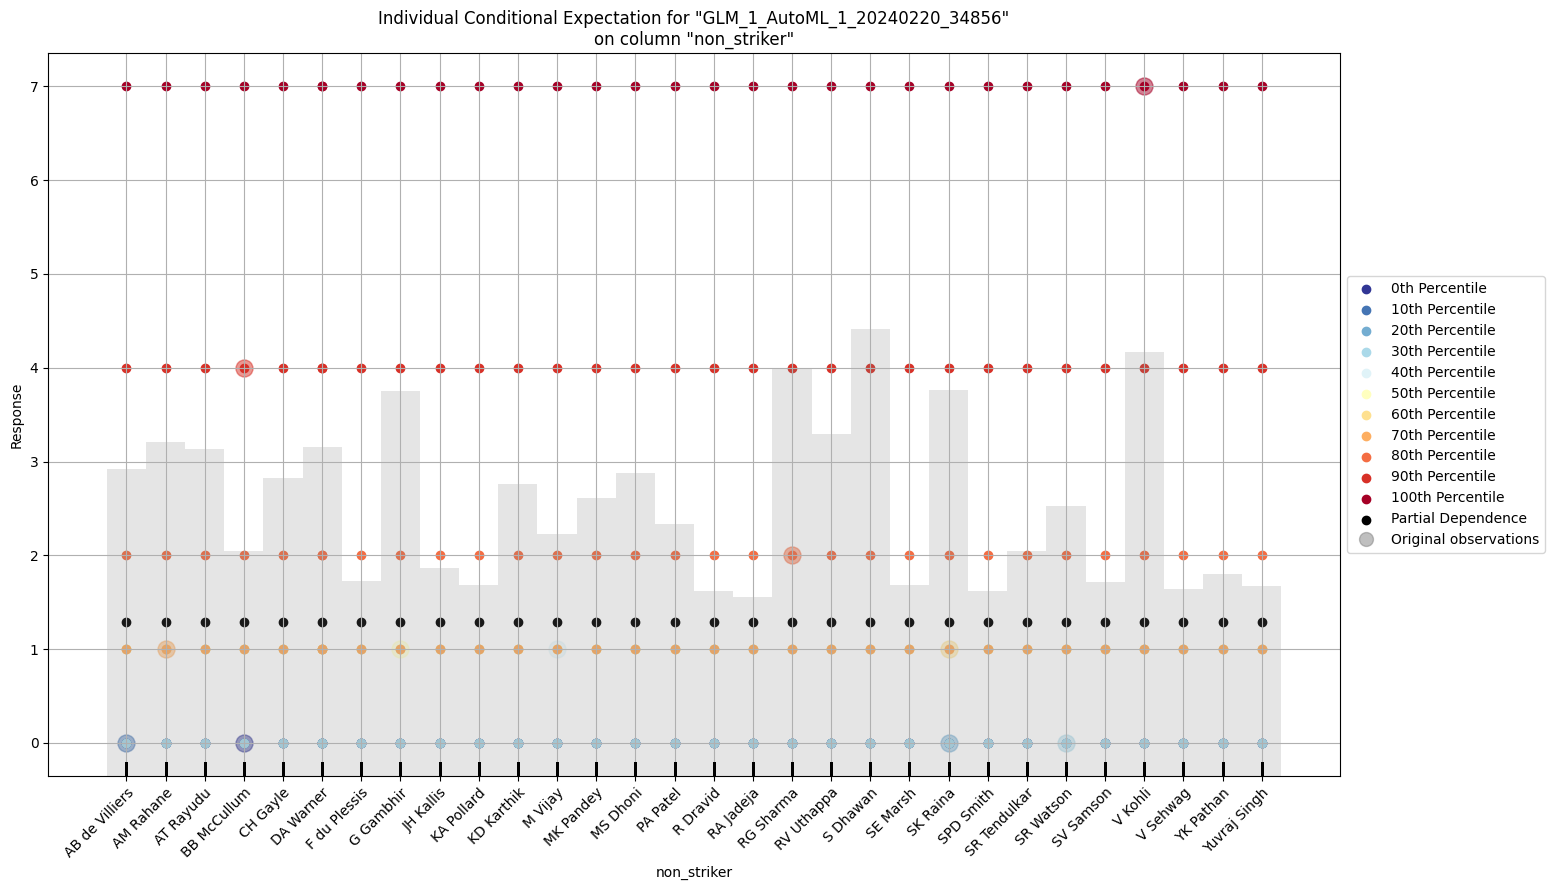

In [176]:
exa = aml.explain(df_test)

# Gradient Boosting Machine (GBM) modeling

In [175]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df_train)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Matches%202008-2020.csv", index_col=0)

In [ ]:
data.corr()

In [ ]:
# Basic data exploration
print(data.describe())
print(data.isnull().sum())


In [ ]:
pandas_df= pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv"
)

h2o_df = h2o.H2OFrame(pandas_df)

In [ ]:
x = ['city', 'venue', 'toss_winner', 'toss_decision', 'team1', 'team2']
y = 'winner'
# x = predictors
# y = response

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

# Define the hyperparameter grid
hyper_params = {'alpha': [0.1, 0.5, 0.9], 'lambda': [1e-5, 1e-3, 1e-1]}

# Initialize grid search
grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator(family="gaussian"),
                     grid_id='glm_grid',
                     hyper_params=hyper_params)

# Train the grid
grid.train(x=x, y=y, training_frame=train, validation_frame=test)

In [ ]:
data_gbm.train(x=x, y=y, training_frame=train, validation_frame=test)


df = data[['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']].dropna() #subset the dataframe